## EDA, Cleaning and Feature Engineering

## Problem Statement
How can you increase your real estate value in Ame, Iowa?

## Executive Summary

I work in a real estate title company in Ame, Iowa and I help clients with their real estate closing. Clients have asked me how to get the most out of their real estate.
By using data analysis and modelling techniques, I find out what brings most value to a real estate and how to get the most out of the property you already have.

### Contents:
- [Data Import](#Data-Import)
- [Exploratory Data Analysis, Data Cleaning and Engineering](#Exploratory-Data-Analysis,-Data-Cleaning-and-Engineering)

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Data Import

In [2]:
# Retrieve the datasets
test_set = pd.read_csv('../datasets/test.csv')
train_set = pd.read_csv('../datasets/train.csv')

In [3]:
test_set.head() # view the retrieved data

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area Pool QC  \
0  Grvl       Reg          Lvl  ...          0            0         0     NaN   
1   NaN       IR1          Lvl  ...          0            0         0     NaN   
2   NaN       IR1          Lvl  ...          0            0         0     NaN   
3   NaN       Reg          Lvl  ...          0            0         0     NaN   
4   NaN       IR1          Lvl  ...          0          185         0     NaN   

  Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  
0   NaN          NaN        0       4     2006        WD   
1   NaN          NaN        0       8     2006        WD   
2   NaN          NaN        0       9     2006        New  
3   NaN          NaN        0       7     2007        WD   
4   NaN          NaN        0       7     2009        WD   

[5 rows x 80 columns]

In [4]:
train_set.head() # view the retrieved data

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [5]:
train_set.describe().T # description of train_set data

count          mean           std          min          25%  \
Id               2051.0  1.474034e+03  8.439808e+02          1.0        753.5   
PID              2051.0  7.135900e+08  1.886918e+08  526301100.0  528458140.0   
MS SubClass      2051.0  5.700878e+01  4.282422e+01         20.0         20.0   
Lot Frontage     1721.0  6.905520e+01  2.326065e+01         21.0         58.0   
Lot Area         2051.0  1.006521e+04  6.742489e+03       1300.0       7500.0   
Overall Qual     2051.0  6.112140e+00  1.426271e+00          1.0          5.0   
Overall Cond     2051.0  5.562165e+00  1.104497e+00          1.0          5.0   
Year Built       2051.0  1.971709e+03  3.017789e+01       1872.0       1953.5   
Year Remod/Add   2051.0  1.984190e+03  2.103625e+01       1950.0       1964.5   
Mas Vnr Area     2029.0  9.969591e+01  1.749631e+02          0.0          0.0   
BsmtFin SF 1     2050.0  4.423005e+02  4.612041e+02          0.0          0.0   
BsmtFin SF 2     2050.0  4.795902e+01  1.650009e+02          0.0          0.0   
Bsmt Unf SF      2050.0  5.677283e+02  4.449548e+02          0.0        220.0   
Total Bsmt SF    2050.0  1.057988e+03  4.494107e+02          0.0        793.0   
1st Flr SF       2051.0  1.164488e+03  3.964469e+02        334.0        879.5   
2nd Flr SF       2051.0  3.293291e+02  4.256710e+02          0.0          0.0   
Low Qual Fin SF  2051.0  5.512921e+00  5.106887e+01          0.0          0.0   
Gr Liv Area      2051.0  1.499330e+03  5.004478e+02        334.0       1129.0   
Bsmt Full Bath   2049.0  4.275256e-01  5.226732e-01          0.0          0.0   
Bsmt Half Bath   2049.0  6.344558e-02  2.517052e-01          0.0          0.0   
Full Bath        2051.0  1.577279e+00  5.492794e-01          0.0          1.0   
Half Bath        2051.0  3.710385e-01  5.010427e-01          0.0          0.0   
Bedroom AbvGr    2051.0  2.843491e+00  8.266183e-01          0.0          2.0   
Kitchen AbvGr    2051.0  1.042906e+00  2.097900e-01          0.0          1.0   
TotRms AbvGrd    2051.0  6.435885e+00  1.560225e+00          2.0          5.0   
Fireplaces       2051.0  5.909313e-01  6.385163e-01          0.0          0.0   
Garage Yr Blt    1937.0  1.978708e+03  2.544109e+01       1895.0       1961.0   
Garage Cars      2050.0  1.776585e+00  7.645374e-01          0.0          1.0   
Garage Area      2050.0  4.736717e+02  2.159346e+02          0.0        319.0   
Wood Deck SF     2051.0  9.383374e+01  1.285494e+02          0.0          0.0   
Open Porch SF    2051.0  4.755680e+01  6.674724e+01          0.0          0.0   
Enclosed Porch   2051.0  2.257192e+01  5.984511e+01          0.0          0.0   
3Ssn Porch       2051.0  2.591419e+00  2.522961e+01          0.0          0.0   
Screen Porch     2051.0  1.651146e+01  5.737420e+01          0.0          0.0   
Pool Area        2051.0  2.397855e+00  3.778257e+01          0.0          0.0   
Misc Val         2051.0  5.157435e+01  5.733940e+02          0.0          0.0   
Mo Sold          2051.0  6.219893e+00  2.744736e+00          1.0          4.0   
Yr Sold          2051.0  2.007776e+03  1.312014e+00       2006.0       2007.0   
SalePrice        2051.0  1.814697e+05  7.925866e+04      12789.0     129825.0   

                         50%           75%          max  
Id                    1486.0  2.198000e+03       2930.0  
PID              535453200.0  9.071801e+08  924152030.0  
MS SubClass             50.0  7.000000e+01        190.0  
Lot Frontage            68.0  8.000000e+01        313.0  
Lot Area              9430.0  1.151350e+04     159000.0  
Overall Qual             6.0  7.000000e+00         10.0  
Overall Cond             5.0  6.000000e+00          9.0  
Year Built            1974.0  2.001000e+03       2010.0  
Year Remod/Add        1993.0  2.004000e+03       2010.0  
Mas Vnr Area             0.0  1.610000e+02       1600.0  
BsmtFin SF 1           368.0  7.337500e+02       5644.0  
BsmtFin SF 2             0.0  0.000000e+00       1474.0  
Bsmt Unf SF            

In [6]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

## Exploratory Data Analysis, Data Cleaning and Engineering

Determine which columns are useful for data exploration and which columns are not. Columns that are not useful will be dropped. Columns remainings will be further analyzed, converted into suitable data type, cleaned of any missing values and used for building the model. 

In [7]:
100 * (train_set.isnull().sum().sort_values(ascending = False)[0:26])/len(train_set)
# variables in training set with null values. We will either drop them or do feature engineering

Pool QC           99.561190
Misc Feature      96.830814
Alley             93.174061
Fence             80.497318
Fireplace Qu      48.756704
Lot Frontage      16.089712
Garage Finish      5.558264
Garage Cond        5.558264
Garage Qual        5.558264
Garage Yr Blt      5.558264
Garage Type        5.509508
Bsmt Exposure      2.827889
BsmtFin Type 2     2.730375
BsmtFin Type 1     2.681619
Bsmt Cond          2.681619
Bsmt Qual          2.681619
Mas Vnr Type       1.072647
Mas Vnr Area       1.072647
Bsmt Half Bath     0.097513
Bsmt Full Bath     0.097513
Garage Cars        0.048757
Garage Area        0.048757
Bsmt Unf SF        0.048757
BsmtFin SF 2       0.048757
Total Bsmt SF      0.048757
BsmtFin SF 1       0.048757
dtype: float64

Dropping all columns with more than 40% null values are they are not helpful in determining the price

In [8]:
train_set.drop(columns = ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'], inplace = True)
# drop all columns with more than 40% null values

In [9]:
test_set.drop(columns = ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'], inplace = True)
# drop all columns with more than 40% null values

Remaining columns will be converted to the suitable data type, further analyzed and cleaned from missing values

In [10]:
train_set.isnull().sum().sort_values(ascending = False)[0:21]
# remaining variables in training set with null values

Lot Frontage      330
Garage Yr Blt     114
Garage Finish     114
Garage Qual       114
Garage Cond       114
Garage Type       113
Bsmt Exposure      58
BsmtFin Type 2     56
Bsmt Qual          55
BsmtFin Type 1     55
Bsmt Cond          55
Mas Vnr Area       22
Mas Vnr Type       22
Bsmt Full Bath      2
Bsmt Half Bath      2
BsmtFin SF 2        1
BsmtFin SF 1        1
Total Bsmt SF       1
Bsmt Unf SF         1
Garage Cars         1
Garage Area         1
dtype: int64

In [11]:
test_set.isnull().sum().sort_values(ascending = False)[0:14]
# remaining variables in test set with null values

Lot Frontage      160
Garage Qual        45
Garage Cond        45
Garage Yr Blt      45
Garage Finish      45
Garage Type        44
BsmtFin Type 1     25
Bsmt Exposure      25
Bsmt Qual          25
Bsmt Cond          25
BsmtFin Type 2     25
Mas Vnr Area        1
Electrical          1
Mas Vnr Type        1
dtype: int64

In [12]:
train_set.groupby('MS Zoning').count()[['Id']]
# very low counts except RL and RM

Id
MS Zoning      
A (agr)       2
C (all)      19
FV          101
I (all)       1
RH           14
RL         1598
RM          316

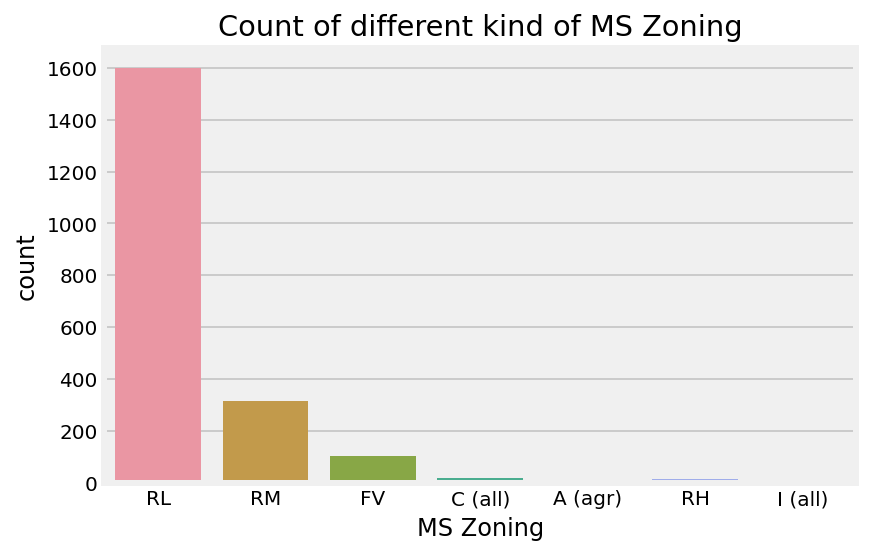

In [13]:
sns.countplot(x='MS Zoning', data = train_set);
plt.title('Count of different kind of MS Zoning');

In [14]:
train_set['MS Zoning'] = train_set['MS Zoning'].apply(lambda zone : zone if zone in ['RL','RM'] else 'zone_other')
test_set['MS Zoning'] = test_set['MS Zoning'].apply(lambda zone : zone if zone in ['RL','RM'] else 'zone_other')
# Those not that does not have RL or RM as MS Zoning will be replaced with other

In [15]:
train_set[['mszoning_RM','mszoning_other']] = pd.get_dummies(train_set['MS Zoning'], drop_first = True)
test_set[['mszoning_RM','mszoning_other']] = pd.get_dummies(test_set['MS Zoning'], drop_first = True)
# create MS Zoning dummies column
train_set.drop(columns = ['MS Zoning'], inplace = True) # drop columns that we already have dummies
test_set.drop(columns = ['MS Zoning'], inplace = True)

In [16]:
train_set[train_set['Lot Frontage'].isna()].iloc[:6,:5]
# There are properties with frontage but shows nan value
# 533352170 has no frontage source : https://beacon.schneidercorp.com/Application.aspx?AppID=165&LayerID=2145&PageTypeID=4&PageID=1108&Q=1868429848&KeyValue=0533352170
# 535353130 has frontage but has nan value in data. Source : https://beacon.schneidercorp.com/Application.aspx?AppID=165&LayerID=2145&PageTypeID=4&PageID=1108&Q=151531963&KeyValue=0535353130

Id        PID  MS SubClass  Lot Frontage  Lot Area
0    109  533352170           60           NaN     13517
7    145  535154050           20           NaN     12160
8   1942  535353130           20           NaN     15783
23    12  527165230           20           NaN      7980
27  1534  909277040           50           NaN     11700
31  2860  909276010           70           NaN     11435

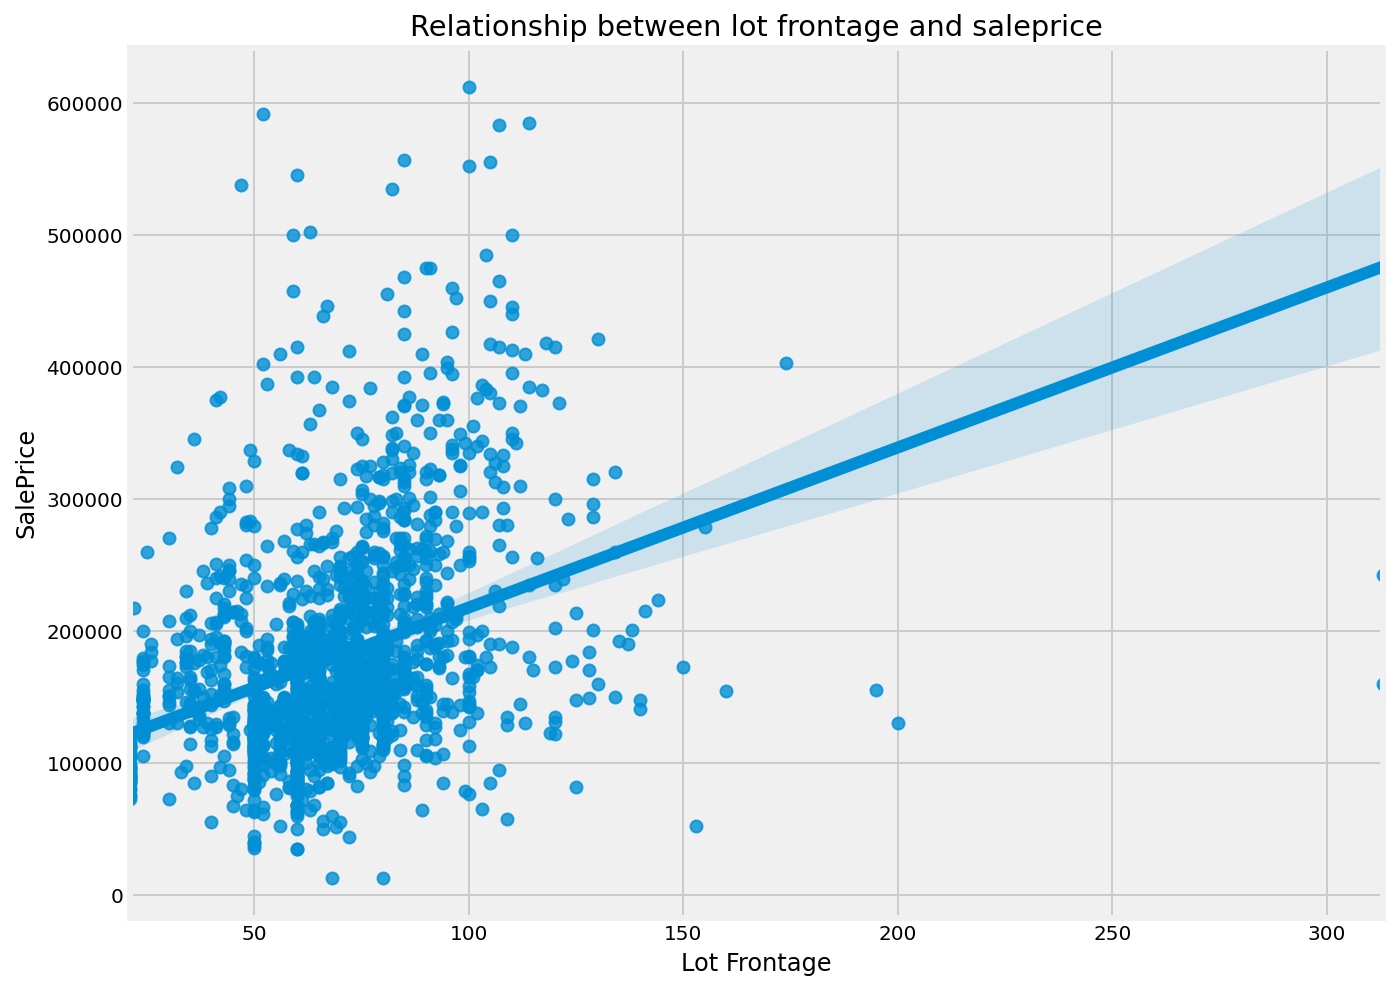

In [17]:
plt.figure(figsize = [10,8]);
sns.regplot(x = 'Lot Frontage', y ='SalePrice', data = train_set);
plt.title('Relationship between lot frontage and saleprice');
# There is a relationship between lot frontage and sale price

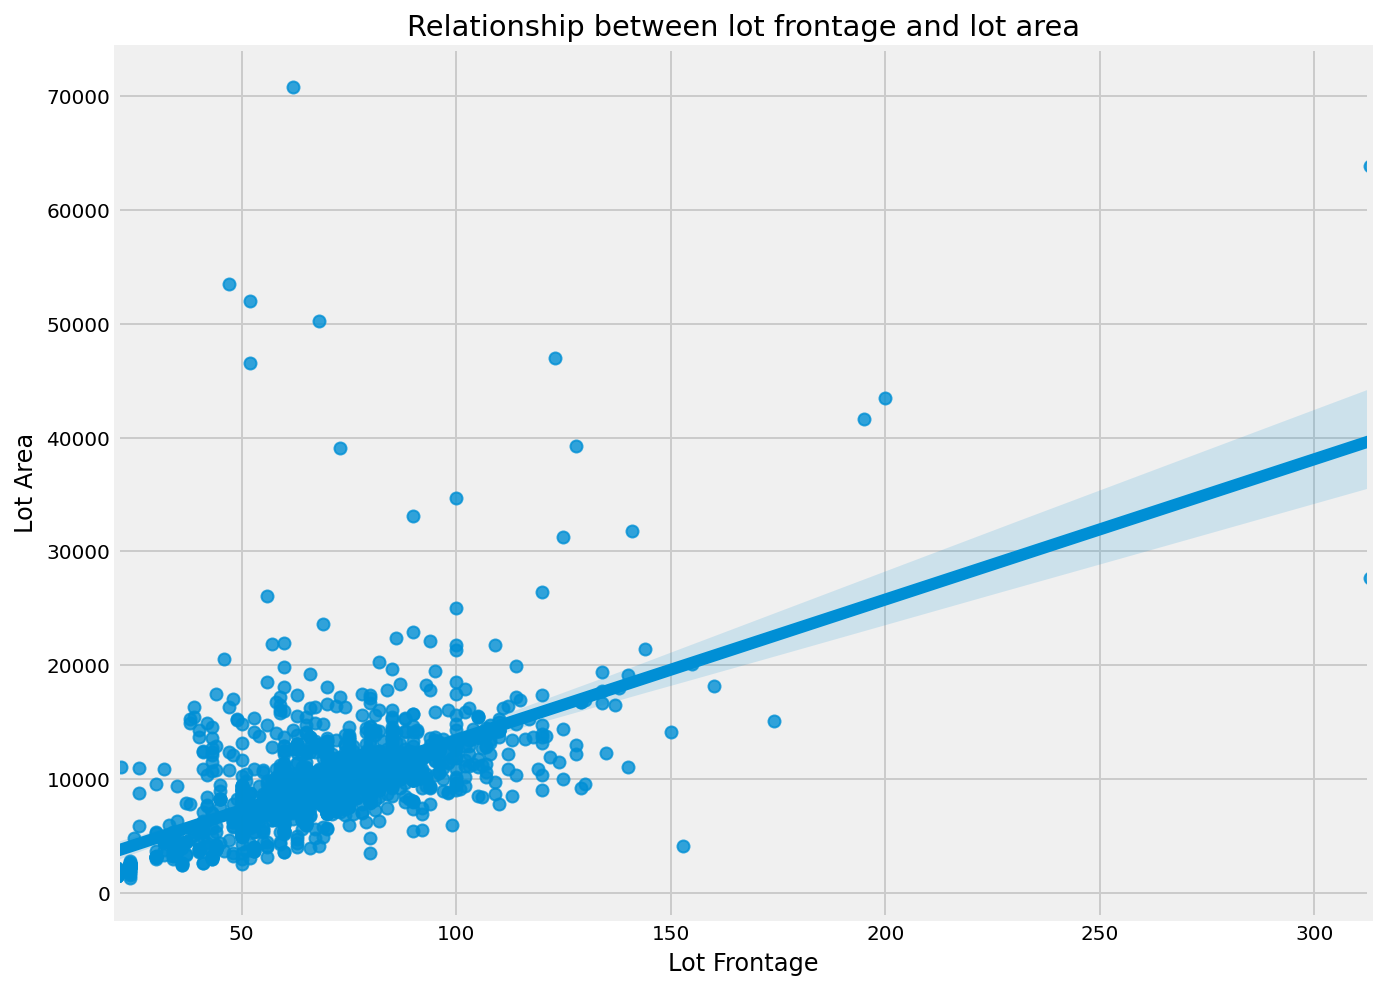

In [18]:
plt.figure(figsize = [10,8]);
path = sns.regplot(x = 'Lot Frontage', y ='Lot Area', data = train_set); # Strong relationship between lot frontage and lot area
plt.title('Relationship between lot frontage and lot area');

In [19]:
m, c = np.polyfit(path.get_lines()[0].get_xdata(),path.get_lines()[0].get_ydata(), deg = 1)
# get the slope, m and the intercept, c of lot frontage and lot area graph

In [20]:
def frontage_func(area,frontage):
    if not(np.isnan(frontage)):
        return frontage
    else:
        return (area - c)/m
# to apply formula to get nan values in frontage: lot frontage = (lot area - c)/m

In [21]:
train_set['Lot Frontage'] = train_set.apply(lambda data : frontage_func(data['Lot Area'],data['Lot Frontage']),axis = 1)
test_set['Lot Frontage'] = test_set.apply(lambda data : frontage_func(data['Lot Area'],data['Lot Frontage']),axis = 1)
# using interpolation method to estimate the lot frontage of the properties

In [22]:
train_set['Lot Frontage'].isna().sum()

0

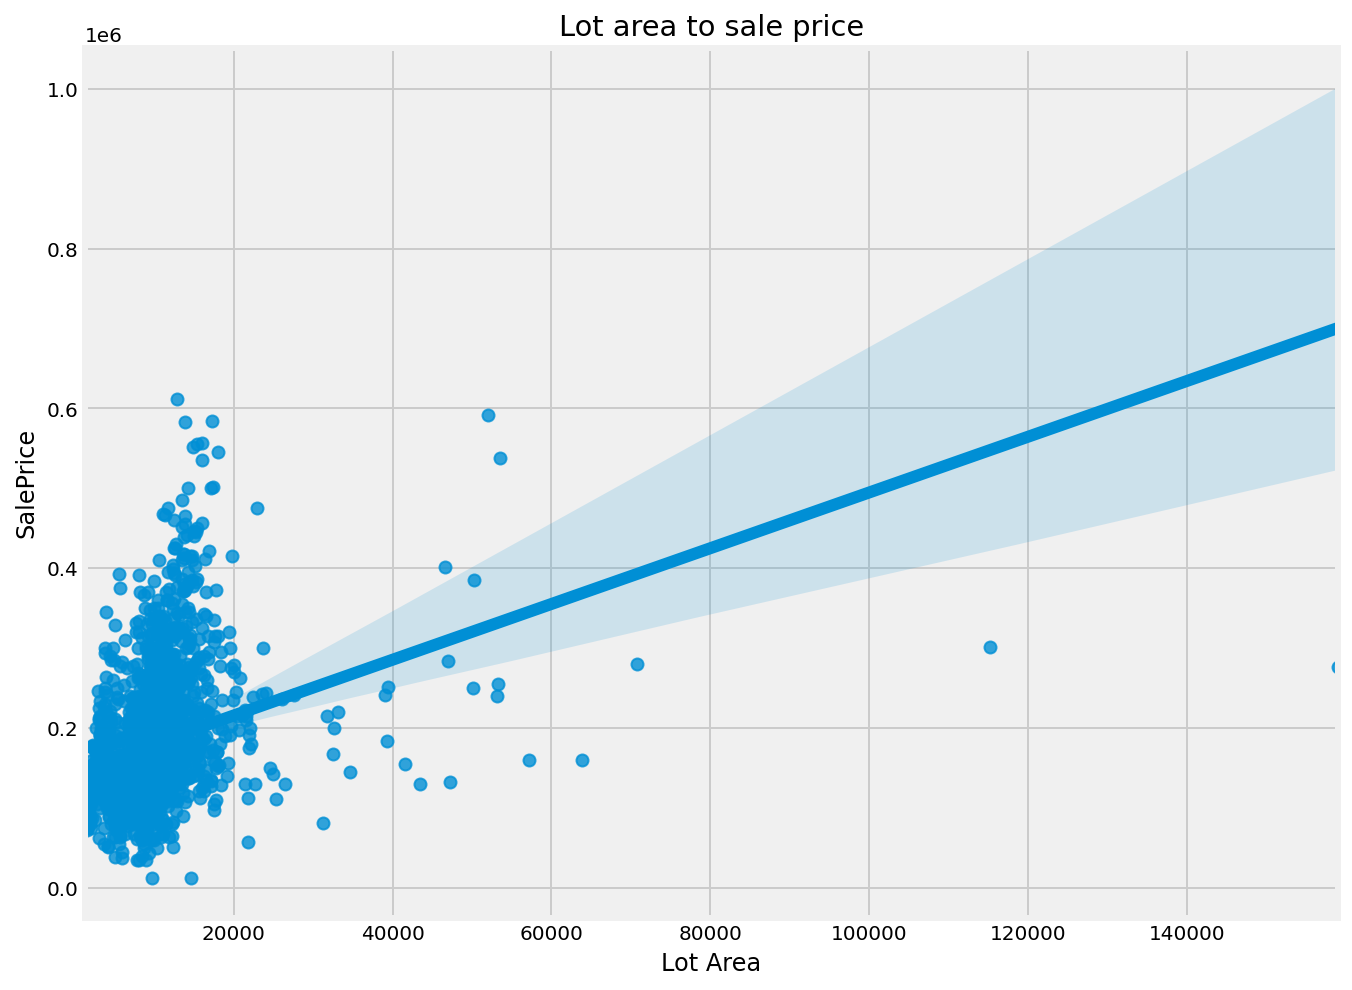

In [23]:
plt.figure(figsize = [10,8]);
sns.regplot(x='Lot Area', y='SalePrice', data = train_set);
plt.title('Lot area to sale price');

In [24]:
train_set['street_pave'] = pd.get_dummies(train_set['Street'], drop_first = True) # create Street dummies column
test_set['street_pave'] = pd.get_dummies(test_set['Street'], drop_first = True)

train_set.drop(columns = ['Street'], inplace = True) # drop columns that we already have dummies
test_set.drop(columns = ['Street'], inplace = True)

In [25]:
train_set.groupby('Lot Shape').count()['Id']

Lot Shape
IR1     692
IR2      55
IR3       9
Reg    1295
Name: Id, dtype: int64

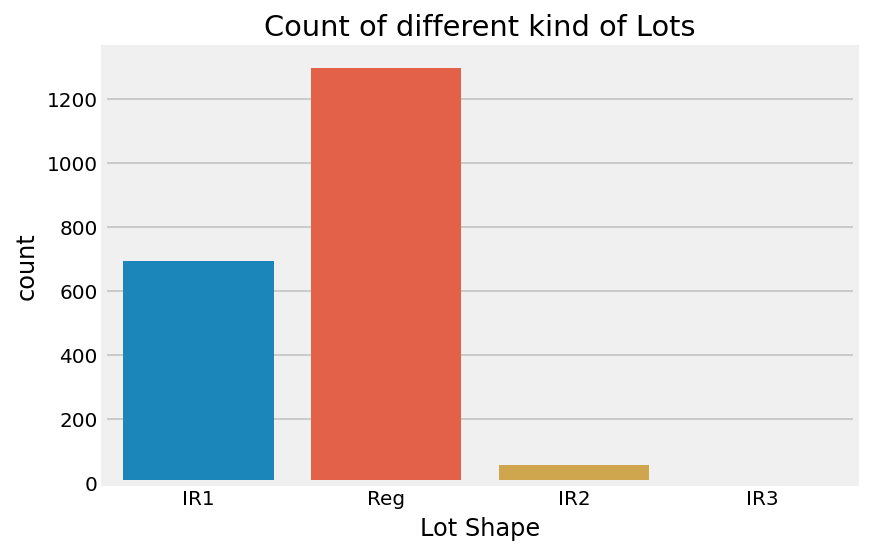

In [26]:
sns.countplot(x='Lot Shape', data = train_set);
plt.title('Count of different kind of Lots');
# very few counts of IR2 and IR3

In [27]:
train_set['Lot Shape'] = train_set['Lot Shape'].apply(lambda shape : shape if shape in ['IR1','Reg'] else 'shape_other')
test_set['Lot Shape'] = test_set['Lot Shape'].apply(lambda shape : shape if shape in ['IR1','Reg'] else 'shape_other')
# reclass IR2 and IR3 to others

In [28]:
train_set[['lotshape_Reg','lotshape_other']] = pd.get_dummies(train_set['Lot Shape'], drop_first = True)
test_set[['lotshape_Reg','lotshape_other']] = pd.get_dummies(test_set['Lot Shape'], drop_first = True)
# create Lot shape dummies column
train_set.drop(columns = ['Lot Shape'], inplace = True) # drop columns that we already have dummies
test_set.drop(columns = ['Lot Shape'], inplace = True)

In [29]:
train_set.groupby('Land Contour').count()['Id']

Land Contour
Bnk      80
HLS      85
Low      43
Lvl    1843
Name: Id, dtype: int64

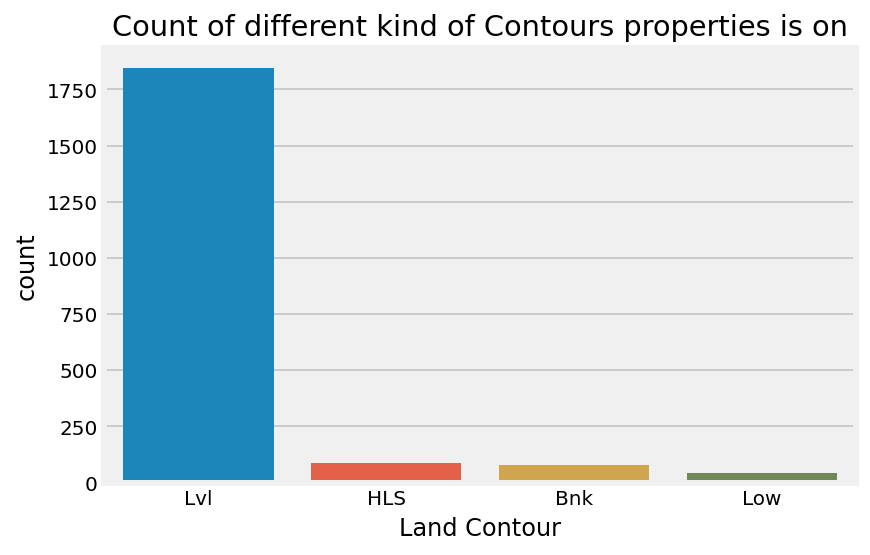

In [30]:
sns.countplot(x='Land Contour', data = train_set);
plt.title('Count of different kind of Contours properties is on');
# Low counts of HLS, Bnk and Low

In [31]:
train_set['Land Contour'] = train_set['Land Contour'].apply(lambda contour : contour if contour == 'Lvl' else 'contour_other')
test_set['Land Contour'] = test_set['Land Contour'].apply(lambda contour : contour if contour == 'Lvl' else 'contour_other')
# reclass HLS, Bnk and Low to others

In [32]:
train_set['landcontour_other'] = pd.get_dummies(train_set['Land Contour'], drop_first = True)
test_set[['landcontour_other']] = pd.get_dummies(test_set['Land Contour'], drop_first = True)
# create Land contour dummies column
train_set.drop(columns = ['Land Contour'], inplace = True) # drop columns that we already have dummies
test_set.drop(columns = ['Land Contour'], inplace = True)

In [33]:
train_set.groupby('Utilities').count()['Id'] # Most properties use AllPub. Feature does not really help in our prediction

Utilities
AllPub    2049
NoSeWa       1
NoSewr       1
Name: Id, dtype: int64

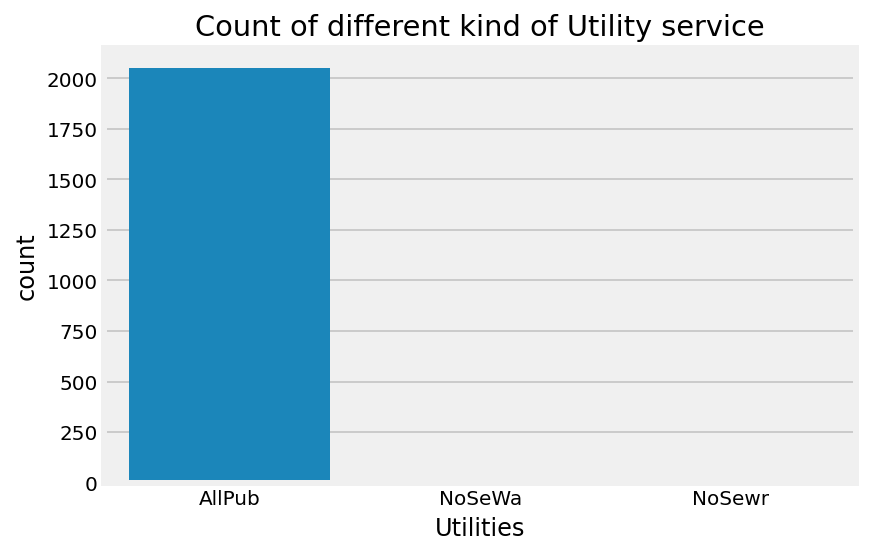

In [34]:
sns.countplot(x='Utilities', data = train_set);
plt.title('Count of different kind of Utility service');

In [35]:
train_set.drop(columns = 'Utilities', inplace = True)
test_set.drop(columns = 'Utilities', inplace = True) # Dropping utilities column as it does not help in our model prediction

In [36]:
train_set.groupby('Lot Config').count()['Id']

Lot Config
Corner      348
CulDSac     131
FR2          60
FR3           9
Inside     1503
Name: Id, dtype: int64

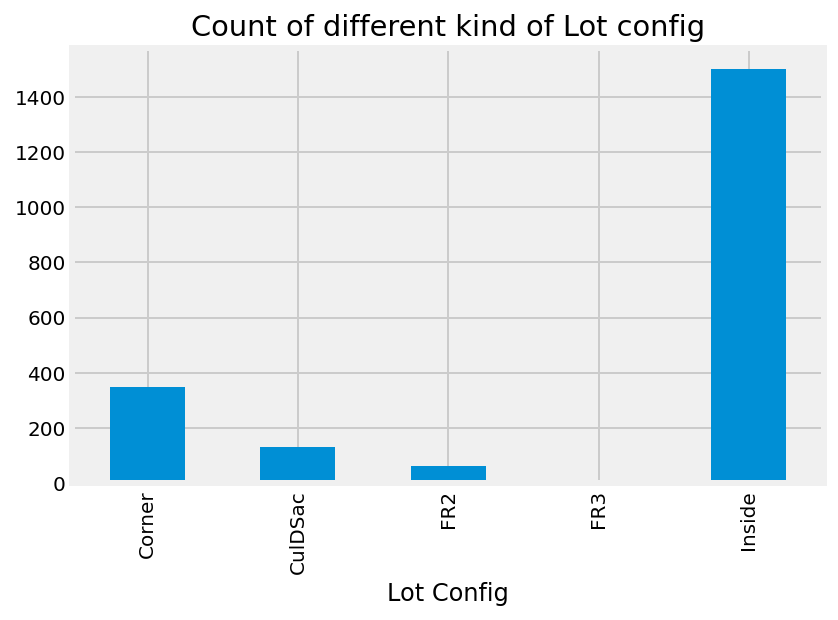

In [37]:
train_set.groupby('Lot Config').count()['Id'].plot(kind = 'bar');
plt.title('Count of different kind of Lot config');
# Low counts of FR2 and FR3

In [38]:
train_set['Lot Config'] = train_set['Lot Config'].apply(lambda config : config if config in ['Inside','Corner', 'CulDSac'] else 'lot_config_other')
test_set['Lot Config'] = test_set['Lot Config'].apply(lambda config : config if config in ['Inside','Corner', 'CulDSac'] else 'lot_config_other')
# reclassing FR2 and FR3 to other

In [39]:
train_set[['lotconfig_CulDSac', 'lotconfig_Inside', 'lotconfig_other']] = pd.get_dummies(train_set['Lot Config'], drop_first = True)
test_set[['lotconfig_CulDSac', 'lotconfig_Inside', 'lotconfig_other']] = pd.get_dummies(test_set['Lot Config'], drop_first = True)
# create Lot config dummies column
train_set.drop(columns = ['Lot Config'], inplace = True) # drop columns that we already have dummies
test_set.drop(columns = ['Lot Config'], inplace = True) 

In [40]:
train_set.groupby('Land Slope').count()['Id']

Land Slope
Gtl    1953
Mod      88
Sev      10
Name: Id, dtype: int64

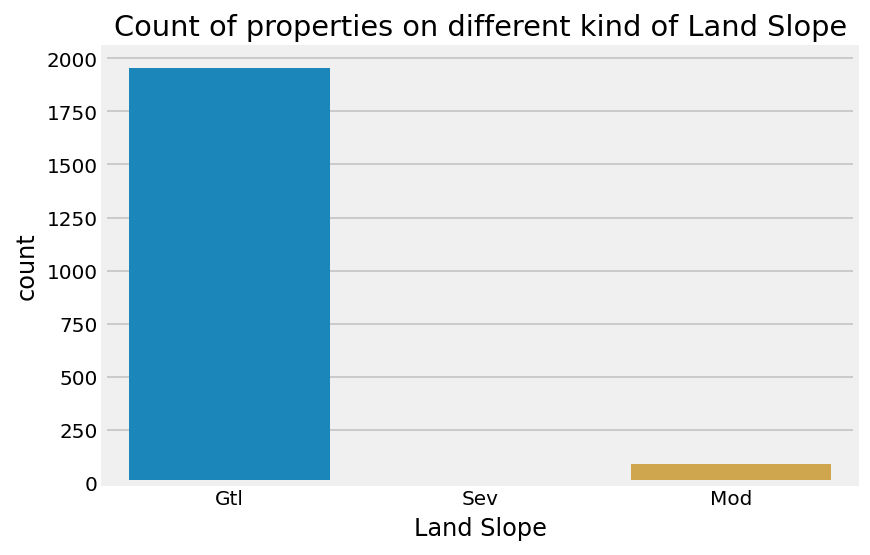

In [41]:
sns.countplot(x='Land Slope', data = train_set);
plt.title('Count of properties on different kind of Land Slope');
# Low count of Sev and Mod

In [42]:
train_set['Land Slope'] = train_set['Land Slope'].apply(lambda slope : slope if slope == 'Gtl' else 'land_slope_other')
test_set['Land Slope'] = test_set['Land Slope'].apply(lambda slope : slope if slope == 'Gtl' else 'land_slope_other')
# regroup Sec and Mod to other

In [43]:
train_set['landslope_other'] = pd.get_dummies(train_set['Land Slope'], drop_first = True)
test_set['landslope_other'] = pd.get_dummies(test_set['Land Slope'], drop_first = True)
# create Land slope dummies column
train_set.drop(columns = ['Land Slope'], inplace = True) # drop columns that we already have dummies
test_set.drop(columns = ['Land Slope'], inplace = True) 

In [44]:
train_set.groupby('Neighborhood').count()['Id']
# Will not reclassify the neighborhoods with few sales. Properties from very expensive neighborhoods does not have high turnover as compared to cheaper neighborhood

Neighborhood
Blmngtn     22
Blueste      6
BrDale      19
BrkSide     76
ClearCr     27
CollgCr    180
Crawfor     71
Edwards    143
Gilbert    116
Greens       3
GrnHill      2
IDOTRR      69
Landmrk      1
MeadowV     24
Mitchel     82
NAmes      310
NPkVill     17
NWAmes      87
NoRidge     48
NridgHt    122
OldTown    163
SWISU       32
Sawyer     111
SawyerW     87
Somerst    130
StoneBr     38
Timber      48
Veenker     17
Name: Id, dtype: int64

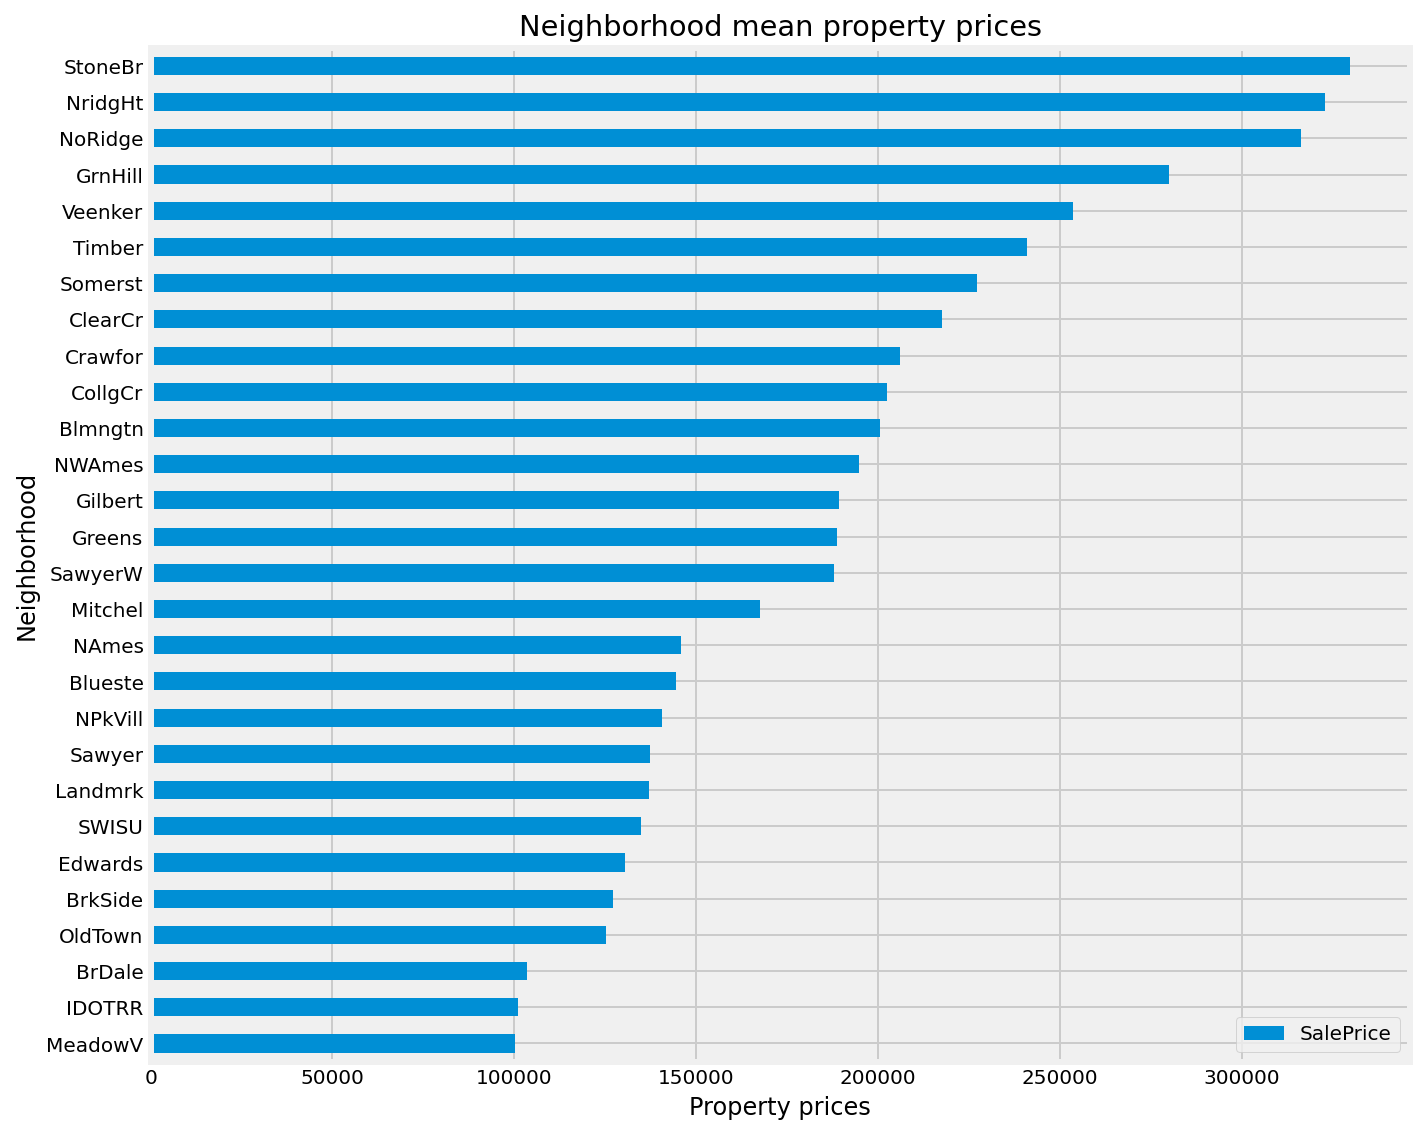

In [45]:
train_set.groupby('Neighborhood').mean()[['SalePrice']].sort_values(by='SalePrice', ascending = True).plot(kind='barh',figsize = [10,8]);
plt.title('Neighborhood mean property prices');
plt.xlabel('Property prices');
plt.tight_layout();

In [46]:
neighborhood_ranking = {'MeadowV':1, 'IDOTRR':2, 'BrDale':3, 'OldTown':4, 'BrkSide':5, 'Edwards':6, 'SWISU':7,
    'Landmrk':8, 'Sawyer':9, 'NPkVill':10, 'Blueste':11, 'NAmes':12, 'Mitchel':13,
       'SawyerW':14, 'Greens':15, 'Gilbert':16, 'NWAmes':17, 'Blmngtn':18, 'CollgCr':19,
       'Crawfor':20, 'ClearCr':21, 'Somerst':22, 'Timber':23, 'Veenker':24, 'GrnHill':25,
       'NoRidge':26, 'NridgHt':27, 'StoneBr':28}
# MeadowV : 1
# IDOTRR : 2
# BrDale : 3
# OldTown : 4
# BrkSide : 5
# Edwards : 6
# SWISU : 7
# Landmrk : 8
# Sawyer : 9
# NPkVill : 10
# Blueste : 11
# NAmes : 12
# Mitchel : 13
# SawyerW : 14
# Greens : 15
# Gilbert : 16
# NWAmes : 17
# Blmngtn : 18
# CollgCr : 19
# Crawfor : 20
# ClearCr : 21
# Somerst : 22
# Timber : 23
# Veenker : 24
# GrnHill : 25
# NoRidge : 26
# NridgHt : 27
# StoneBr : 28

In [47]:
def neighborhood_rank(neighborhood_):
    return neighborhood_ranking[neighborhood_]
    # ranking each neighborhood in terms of average property price

In [48]:
test_set['Neighborhood_rank'] = test_set['Neighborhood'].apply(neighborhood_rank)
train_set['Neighborhood_rank'] = train_set['Neighborhood'].apply(neighborhood_rank)
# Adding neighborhood ranking into datasets. Ordinal categorical data

train_set.drop(columns = ['Neighborhood'], inplace = True)
test_set.drop(columns = ['Neighborhood'], inplace = True) # Dropping neighborhood columns

In [49]:
train_set.groupby('Condition 1').count()['Id']
#  Will not reclassify those condition that has few samples as property prices are sensitive to location and proximity to places of interest

Condition 1
Artery      70
Feedr      109
Norm      1767
PosA        12
PosN        27
RRAe        21
RRAn        36
RRNe         3
RRNn         6
Name: Id, dtype: int64

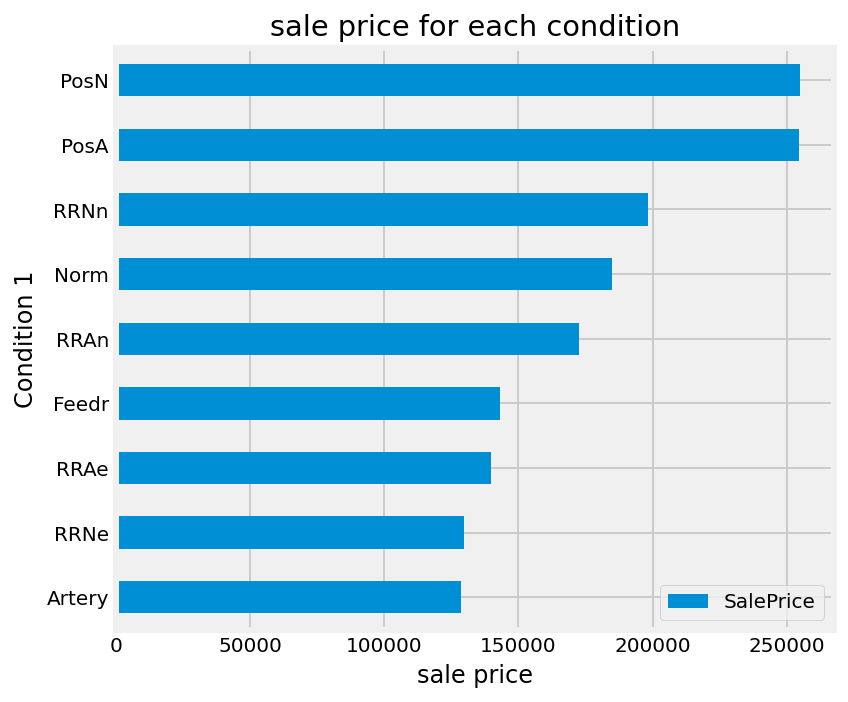

In [50]:
train_set.groupby('Condition 1').mean()[['SalePrice']].sort_values(by='SalePrice', ascending = True).plot(kind='barh',figsize=[6,5]);
plt.title('sale price for each condition')
plt.xlabel('sale price')
plt.tight_layout();

In [51]:
condition_ranking = {'Artery': 1, 'RRNe': 2, 'RRAe': 3, 'Feedr': 4, 'RRAn': 5, 'Norm': 6, 'RRNn': 7, 'PosA': 8,'PosN': 9}
# Artery: 1
# RRNe: 2
# RRAe: 3
# Feedr: 4
# RRAn: 5
# Norm: 6
# RRNn: 7
# PosA: 8
# PosN: 9

In [52]:
def condition_rank(condition_):
    return condition_ranking[condition_]
    # ranking each Conditions in terms of average property price

In [53]:
test_set['Condition1'] = test_set['Condition 1'].apply(condition_rank)
train_set['Condition1'] = train_set['Condition 1'].apply(condition_rank)
test_set['Condition2'] = test_set['Condition 2'].apply(condition_rank)
train_set['Condition2'] = train_set['Condition 2'].apply(condition_rank)
# Adding Conditions ranking into datasets. Ordinal categorical data
train_set.drop(columns = ['Condition 1', 'Condition 2'], inplace = True)
test_set.drop(columns = ['Condition 1', 'Condition 2'], inplace = True) # Dropping condition 1 and condition 2 columns

In [54]:
train_set.groupby('Bldg Type').count()['Id']

Bldg Type
1Fam      1700
2fmCon      46
Duplex      75
Twnhs       69
TwnhsE     161
Name: Id, dtype: int64

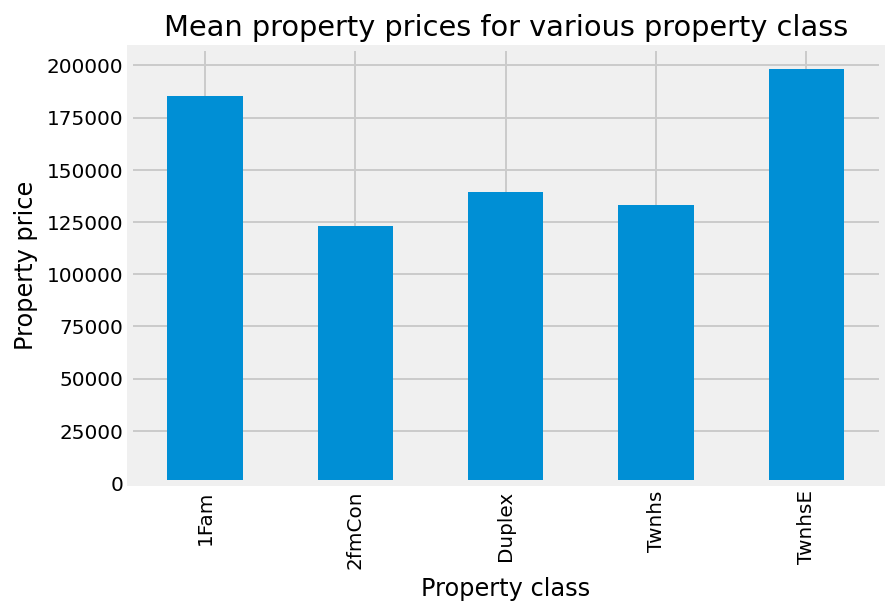

In [55]:
train_set.groupby('Bldg Type').mean()['SalePrice'].plot(kind='bar');
plt.title('Mean property prices for various property class');
plt.ylabel('Property price');
plt.xlabel('Property class');

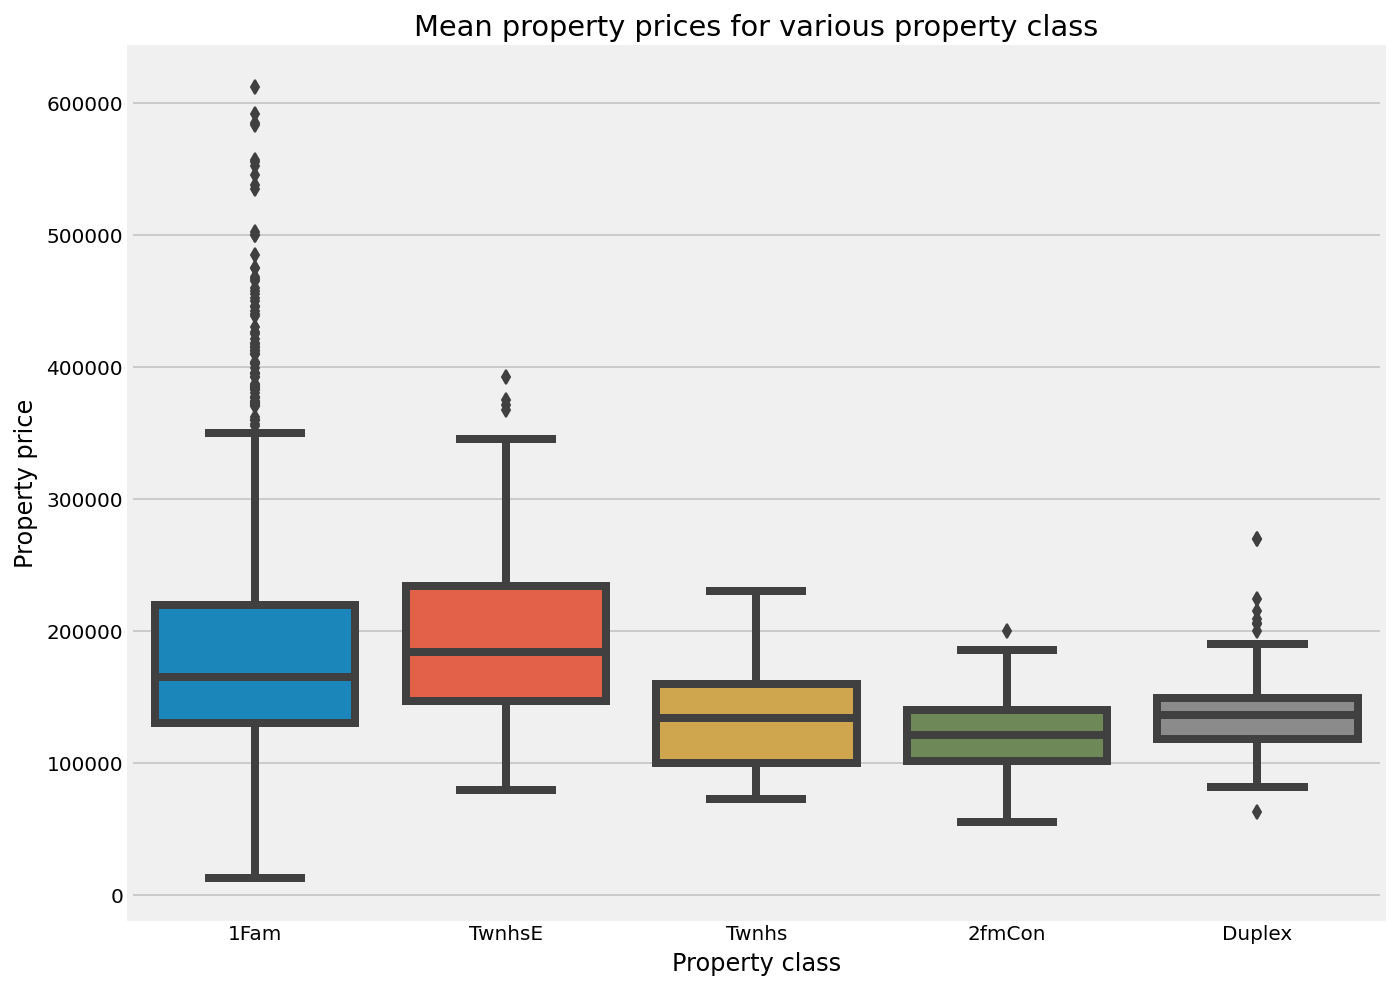

In [56]:
plt.figure(figsize = [10,8]);
sns.boxplot(y='SalePrice', data = train_set, x = 'Bldg Type');
plt.title('Mean property prices for various property class');
plt.ylabel('Property price');
plt.xlabel('Property class');
# Property class is not much of a significance for price

In [57]:
train_set[['bldgtype_2fmCon', 'bldgtype_Duplex', 'bldgtype_Twnhs', 'bldgtype_TwnhsE']] = pd.get_dummies(train_set['Bldg Type'], drop_first = True)
test_set[['bldgtype_2fmCon', 'bldgtype_Duplex', 'bldgtype_Twnhs', 'bldgtype_TwnhsE']] = pd.get_dummies(test_set['Bldg Type'], drop_first = True)
# create building type dummies column
train_set.drop(columns = ['Bldg Type'], inplace = True) # drop columns that we already have dummies
test_set.drop(columns = ['Bldg Type'], inplace = True)

In [58]:
train_set.groupby('House Style').count()['Id']

House Style
1.5Fin     218
1.5Unf      12
1Story    1059
2.5Fin       6
2.5Unf      14
2Story     598
SFoyer      50
SLvl        94
Name: Id, dtype: int64

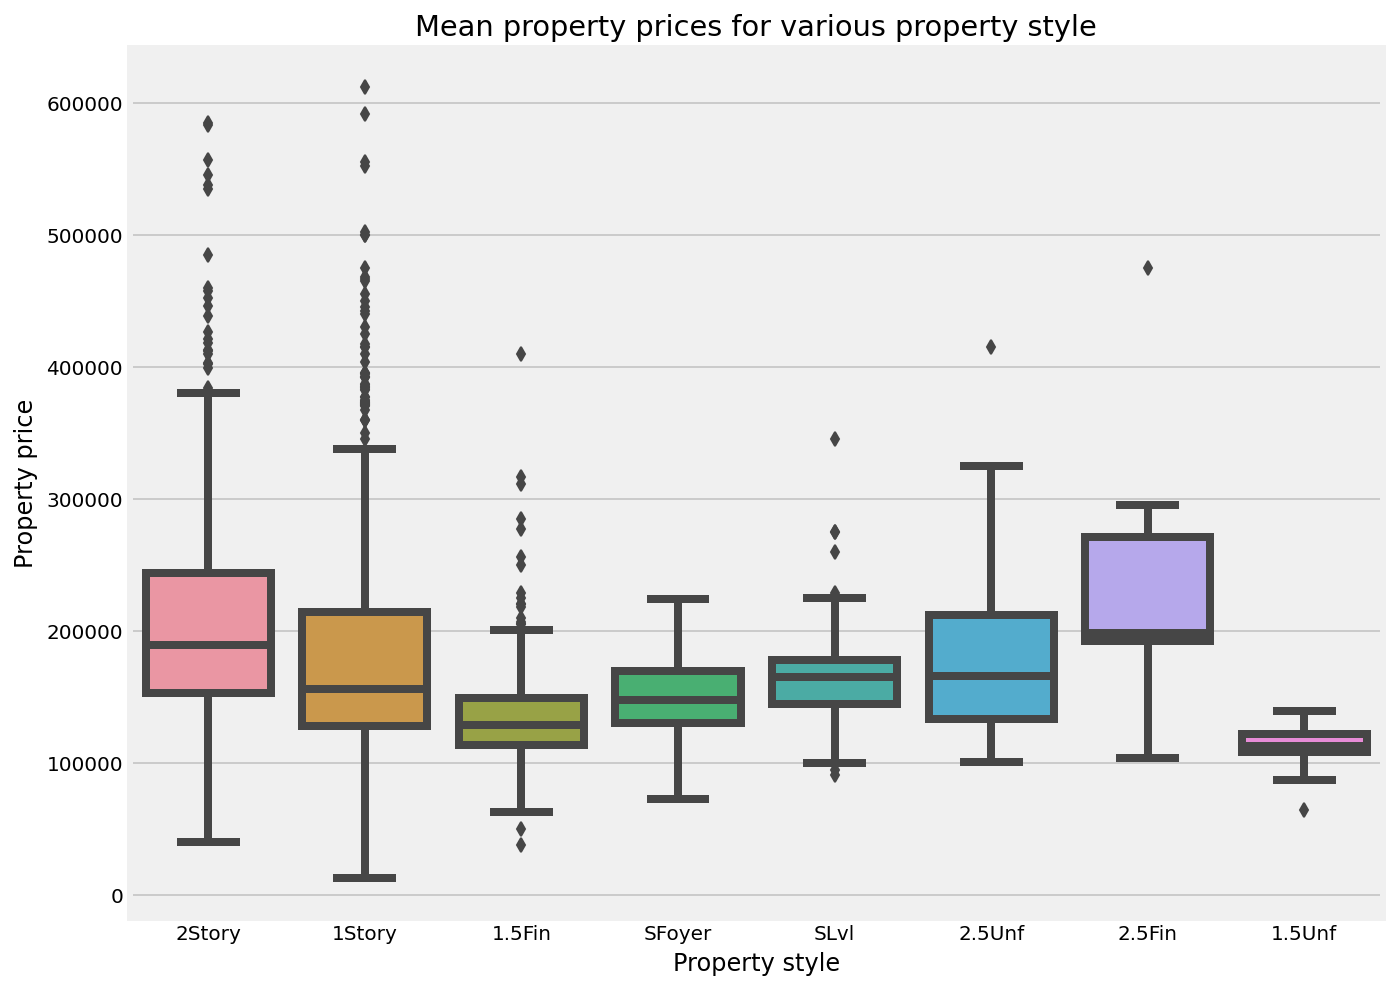

In [59]:
plt.figure(figsize = [10,8]);
sns.boxplot(y='SalePrice', data = train_set, x = 'House Style');
plt.title('Mean property prices for various property style');
plt.ylabel('Property price');
plt.xlabel('Property style');
# 2 story houses have a higher mean in general

In [60]:
train_set['House Style'] = train_set['House Style'].apply(lambda style : 1 if style[0]=='1' else 2)
test_set['House Style'] = test_set['House Style'].apply(lambda style : 1 if style[0]=='1' else 2)
#  Grouping properties with 1.5 finish and unfinsh together with 1Story
#  Grouping properties with 2.5 finish and unfinsh together with 2Story
#  Split foyer or split level houses are 2 stories. Source : https://www.rockethomes.com/blog/home-buying/split-level-house#:~:text=How%20many%20stories%20is%20a,halfway%20between%20the%20two%20floors.

In [61]:
train_set.dtypes[5:21]

House Style         int64
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
Foundation         object
Bsmt Qual          object
Bsmt Cond          object
dtype: object

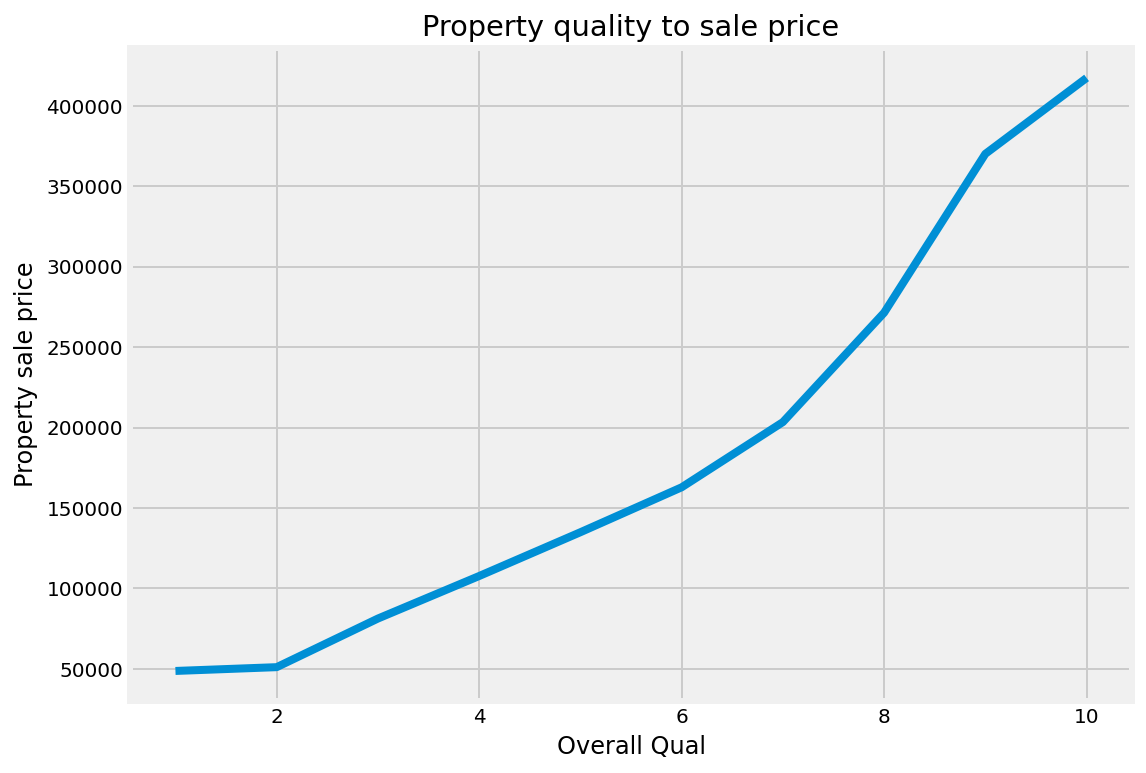

In [62]:
train_set.groupby('Overall Qual')['SalePrice'].mean().plot(figsize = [8,6]);
plt.title('Property quality to sale price');
plt.ylabel('Property sale price');
# The higher the overall quality, the more valuable the property

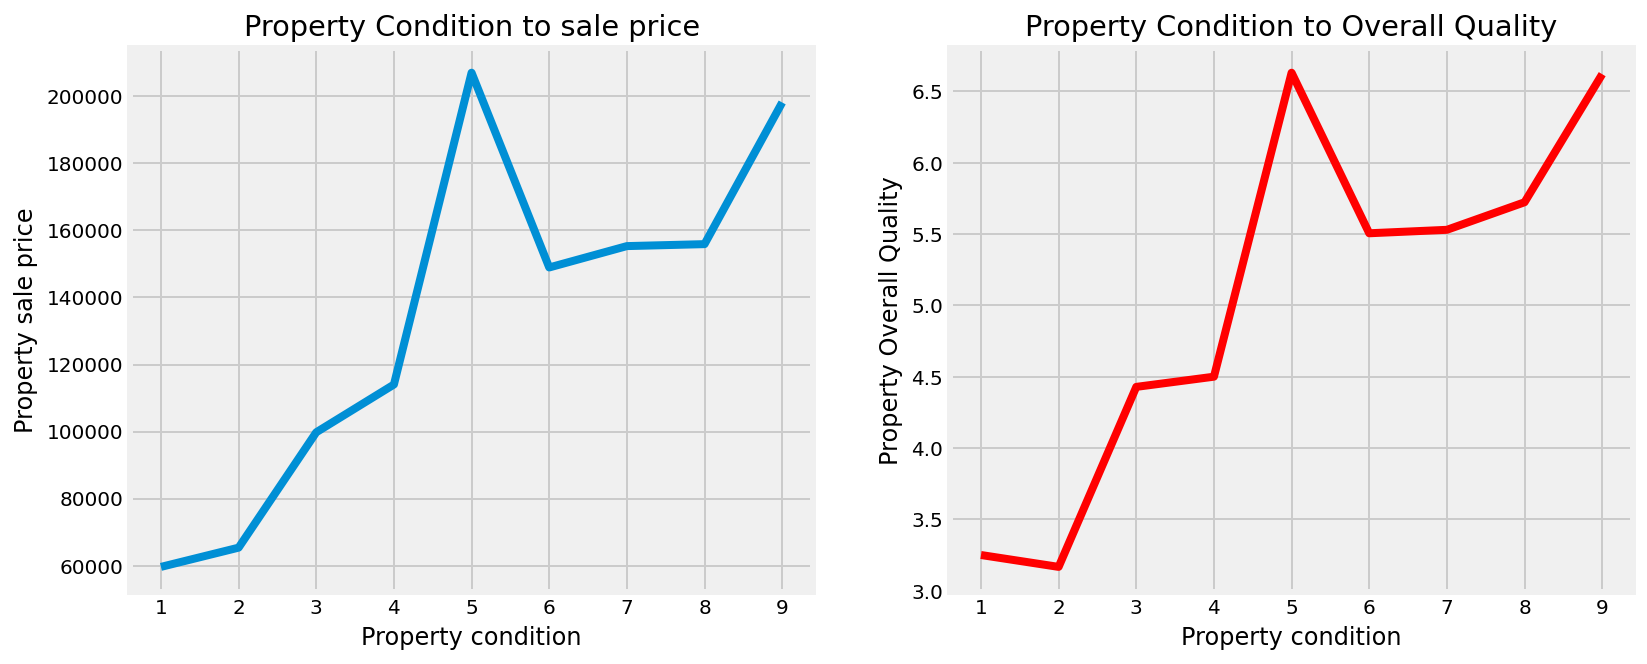

In [63]:
fig,ax =plt.subplots(1,2,figsize=[12,5])
ax[0].plot(train_set.groupby('Overall Cond')['SalePrice'].mean())
ax[0].set_title('Property Condition to sale price');
ax[0].set_ylabel('Property sale price');
ax[0].set_xlabel('Property condition');
# The higher the overall condition, the more valuable the property. There might be outliers, diving deeper into the data
ax[1].plot(train_set.groupby('Overall Cond')['Overall Qual'].mean(),c='r')
ax[1].set_title('Property Condition to Overall Quality');
ax[1].set_ylabel('Property Overall Quality');
ax[1].set_xlabel('Property condition');
# The better the overall condition, the higher the overall quality of the property. Similiar trend as condition to sale price
# There are outliers for samples with property condition = 5, diving deeper into the data

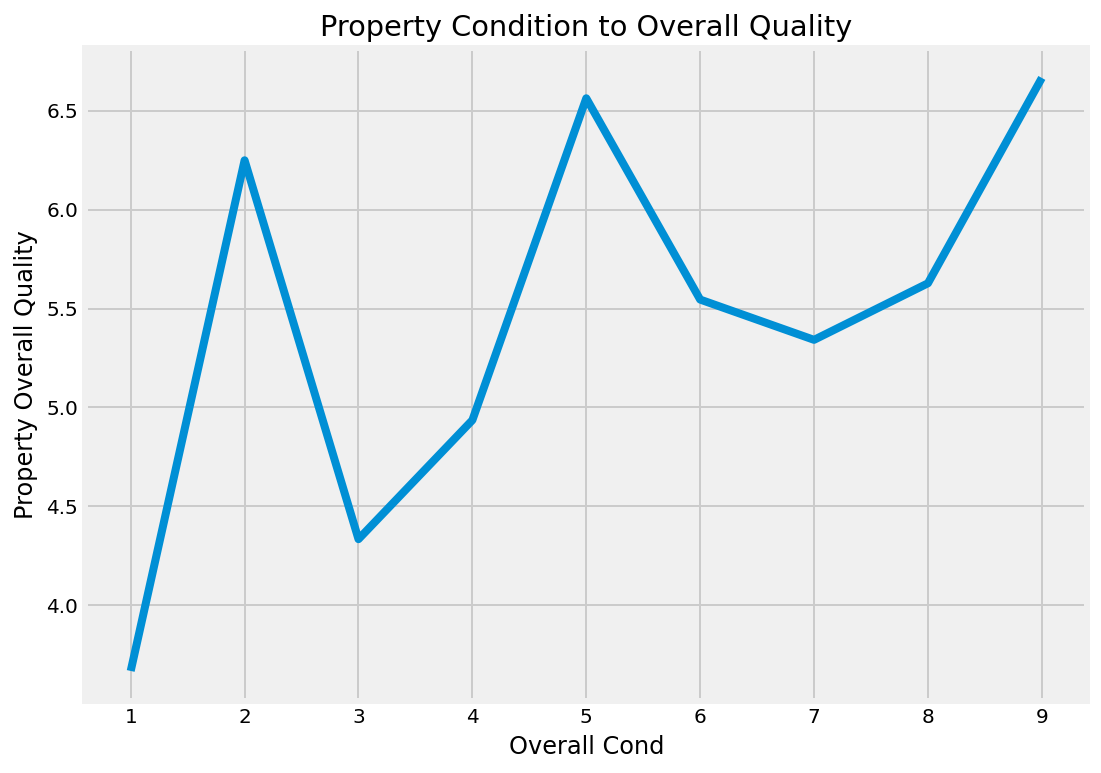

In [64]:
test_set.groupby('Overall Cond')['Overall Qual'].mean().plot(figsize = [8,6]);
plt.title('Property Condition to Overall Quality');
plt.ylabel('Property Overall Quality');
# Same case for test set. The higher the overall condition, the higher the overall quality of the property.

In [65]:
train_set.groupby('Overall Cond')[['SalePrice']].mean()
# Some of the group 5 conditions might be wrongly classified. Might have been group 10 instead.

SalePrice
Overall Cond               
1              59625.000000
2              65364.833333
3              99786.000000
4             114034.571429
5             207055.988870
6             148952.665761
7             155327.270370
8             155913.366337
9             198177.586207

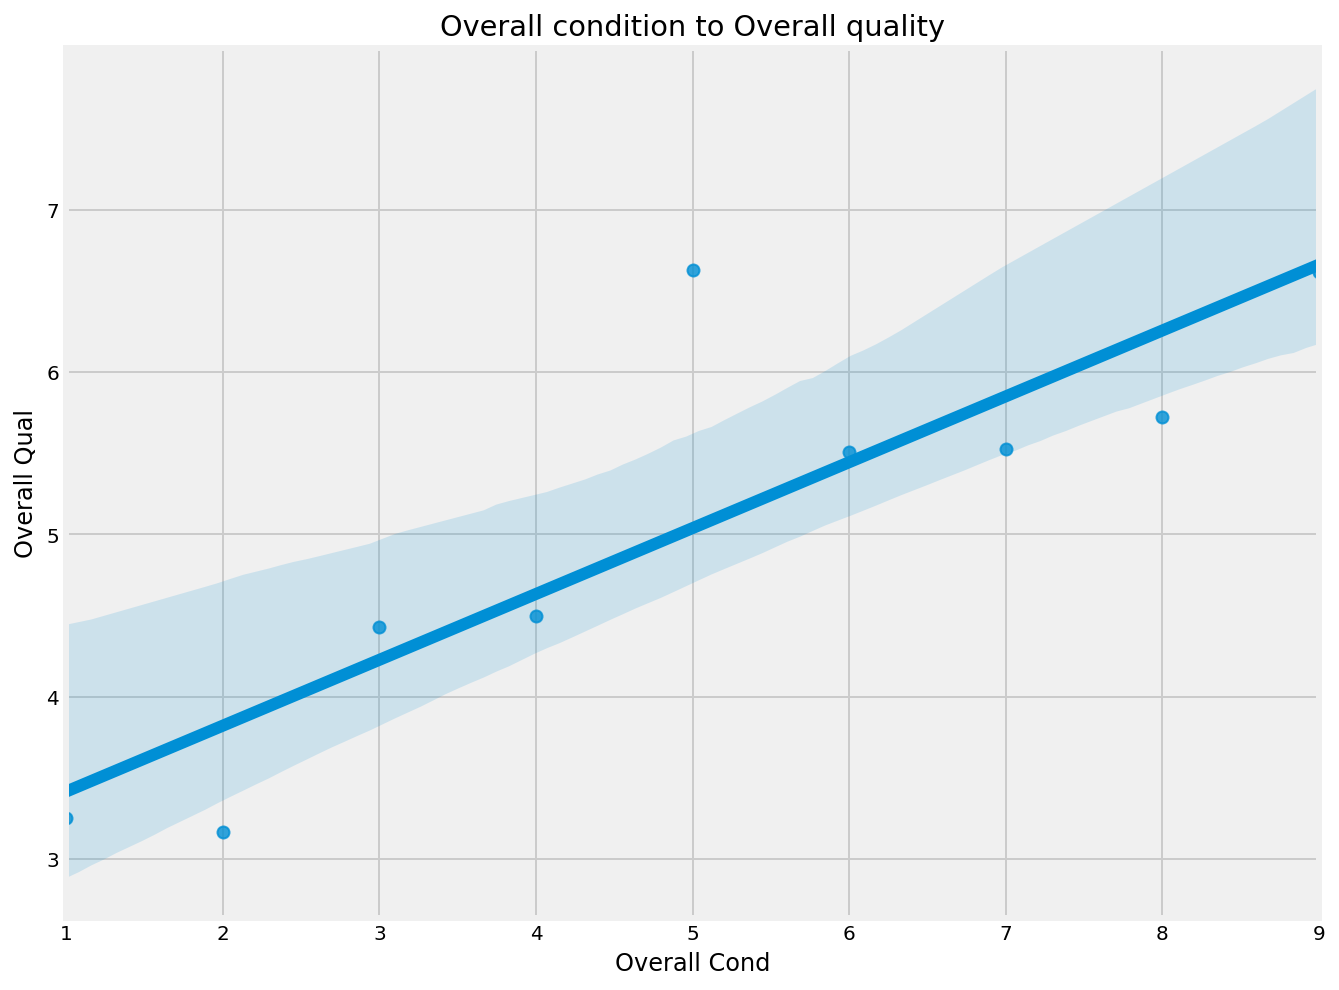

In [66]:
plt.figure(figsize = [10,8])
cond_reg = sns.regplot(x = 'Overall Cond', y = 'Overall Qual', data = train_set.groupby('Overall Cond')[['Overall Qual']].mean().reset_index());
plt.title('Overall condition to Overall quality');
# Will use interpolation to re-engineer condition of group 5 for those that has overall quality above upper quartile of reg line, approximately 5.7

In [67]:
cond_m, cond_c = np.polyfit(cond_reg.get_lines()[0].get_xdata(),cond_reg.get_lines()[0].get_ydata(), deg = 1)
# get the slope, cond_m and the intercept, cond_c of overall condition and saleprice

In [68]:
def cond_func(condition,overallqual):
    if condition != 5:
        return condition
    
    else:
        if overallqual > 5.7:
            new_cond = int(np.round((overallqual - cond_c)/cond_m))
            
            if new_cond > 10:
                return 10
            
            elif new_cond <1:
                return 1
            
            else:
                return new_cond
        else:
            return condition

# to apply formula to re-engineer the condition values for samples in condition 5 that has more than 162500 saleprice

In [69]:
train_set['Overall Cond'] = train_set.apply(lambda data : cond_func(data['Overall Cond'], data['Overall Qual']), axis = 1)
test_set['Overall Cond'] = test_set.apply(lambda data : cond_func(data['Overall Cond'], data['Overall Qual']), axis = 1)
# re-engineer the condition values for samples in condition 5

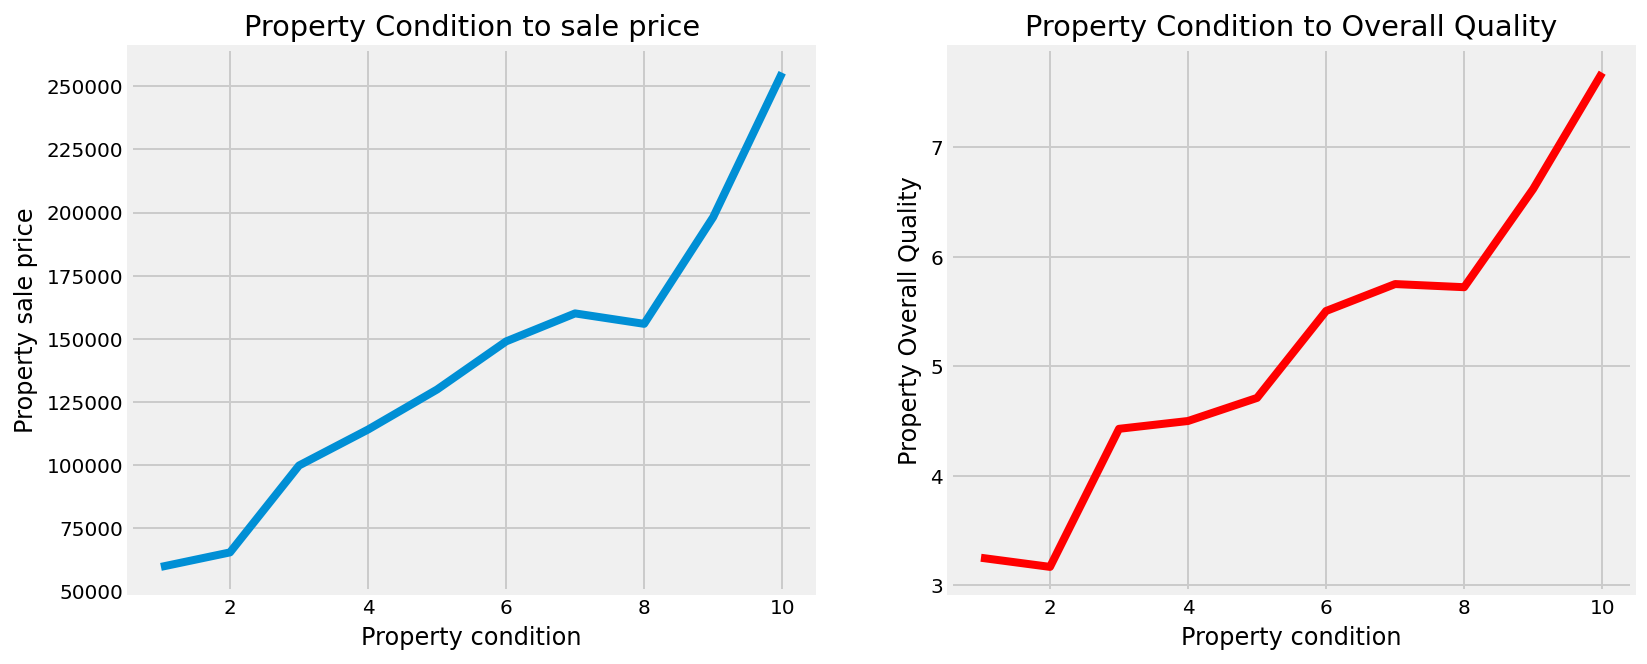

In [70]:
fig,ax =plt.subplots(1,2,figsize=[12,5])
ax[0].plot(train_set.groupby('Overall Cond')['SalePrice'].mean())
ax[0].set_title('Property Condition to sale price');
ax[0].set_ylabel('Property sale price');
ax[0].set_xlabel('Property condition');
ax[1].plot(train_set.groupby('Overall Cond')['Overall Qual'].mean(),c='r')
ax[1].set_title('Property Condition to Overall Quality');
ax[1].set_ylabel('Property Overall Quality');
ax[1].set_xlabel('Property condition');
# Re-engineered property condition class 5

In [71]:
train_set[train_set['Year Remod/Add'] < train_set['Year Built']]
# year remod should not be smaller than year built. Remodelling such samples to match year built

Id        PID  MS SubClass  Lot Frontage  Lot Area  House Style  \
1003  851  907194160           20          65.0     10739            1   

      Overall Qual  Overall Cond  Year Built  Year Remod/Add  ...  \
1003             7            10        2002            2001  ...   

     lotconfig_Inside lotconfig_other landslope_other Neighborhood_rank  \
1003                1               0               0                19   

     Condition1  Condition2 bldgtype_2fmCon bldgtype_Duplex bldgtype_Twnhs  \
1003          6           6               0               0              0   

     bldgtype_TwnhsE  
1003               0  

[1 rows x 82 columns]

In [72]:
def built_remod(built,remod):
    if remod < built:
        return built
    else:
        return remod
# function to change remod year to built year if remod year is earlier than year built

In [73]:
train_set['Year Remod/Add'] = train_set.apply(lambda data : built_remod(data['Year Built'],data['Year Remod/Add']),axis=1)
test_set['Year Remod/Add'] = test_set.apply(lambda data : built_remod(data['Year Built'],data['Year Remod/Add']),axis=1)
# Change remod year to built year if remod year is earlier than year built

In [74]:
train_set.groupby('Roof Style').count()['Id']
# There are very few properties with Flat, Gambrel, Mansard and Shed roof style

Roof Style
Flat         13
Gable      1619
Gambrel      12
Hip         397
Mansard       7
Shed          3
Name: Id, dtype: int64

In [75]:
train_set['Roof Style'] = train_set['Roof Style'].apply(lambda roof_style : roof_style if roof_style in ['Gable','Hip'] else 'roof_other')
test_set['Roof Style'] = test_set['Roof Style'].apply(lambda roof_style : roof_style if roof_style in ['Gable','Hip'] else 'roof_other')
# reclassing anything other than Gable and Hip to other

In [76]:
train_set[['roofstyle_Hip', 'roofstyle_other']] = pd.get_dummies(train_set['Roof Style'], drop_first = True)
test_set[['roofstyle_Hip', 'roofstyle_other']] = pd.get_dummies(test_set['Roof Style'], drop_first = True)
# create Roof Style dummies column
train_set.drop(columns = ['Roof Style'], inplace = True) # drop roof style column
test_set.drop(columns = ['Roof Style'], inplace = True) 

In [77]:
train_set.groupby('Roof Matl').count()['Id']

Roof Matl
ClyTile       1
CompShg    2025
Membran       1
Tar&Grv      15
WdShake       4
WdShngl       5
Name: Id, dtype: int64

Text(0, 0.5, 'count')

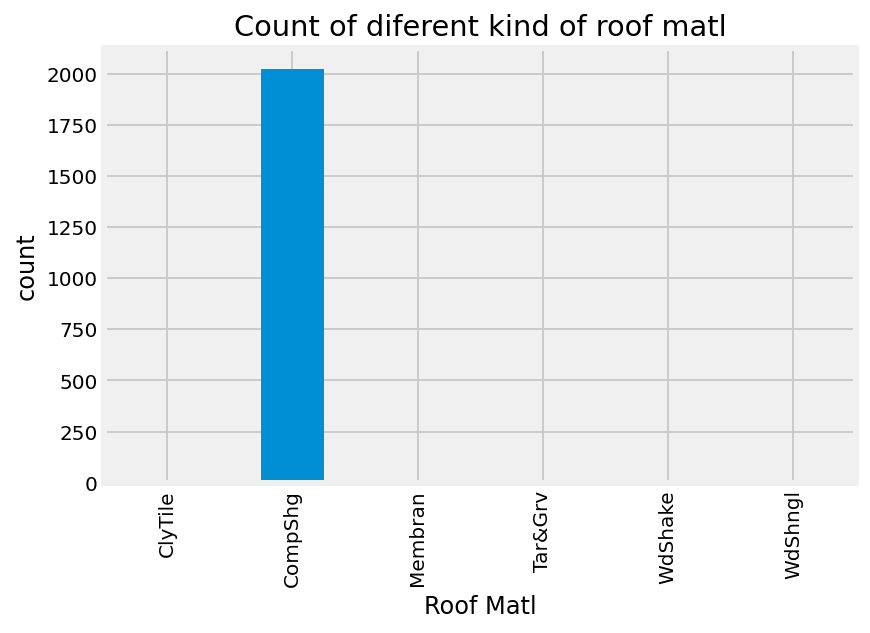

In [78]:
train_set.groupby('Roof Matl').count()['Id'].plot(kind = 'bar');
plt.title('Count of diferent kind of roof matl')
plt.ylabel('count')

In [79]:
train_set['Roof Matl'] = train_set['Roof Matl'].apply(lambda roof_matl : roof_matl if roof_matl == 'CompShg' else 'matl_other')
test_set['Roof Matl'] = test_set['Roof Matl'].apply(lambda roof_matl : roof_matl if roof_matl == 'CompShg' else 'matl_other')
# Reclass anything other than CompShg to other

In [80]:
train_set['roof_matl_other'] = pd.get_dummies(train_set['Roof Matl'], drop_first = True)
test_set['roof_matl_other'] = pd.get_dummies(test_set['Roof Matl'], drop_first = True) # create Roof Matl dummies column

train_set.drop(columns = ['Roof Matl'], inplace = True) # drop roof matl column
test_set.drop(columns = ['Roof Matl'], inplace = True) 

In [81]:
train_set.groupby('Exterior 1st').count()[['Id']]
# Will reclassify all those exterior material that is used by less than 40 samples to 'exterior_others'

Id
Exterior 1st     
AsbShng        33
AsphShn         1
BrkComm         3
BrkFace        64
CBlock          2
CemntBd        90
HdBoard       300
ImStucc         1
MetalSd       331
Plywood       152
Stone           2
Stucco         27
VinylSd       724
Wd Sdng       276
WdShing        45

In [82]:
train_set['Exterior 1st'] = train_set['Exterior 1st'].apply(lambda exterior : exterior if exterior in ['BrkFace','CemntBd','HdBoard','MetalSd','Plywood','VinylSd','Wd Sdng'] else 'exterior_others')
test_set['Exterior 1st'] = test_set['Exterior 1st'].apply(lambda exterior : exterior if exterior in ['BrkFace','CemntBd','HdBoard','MetalSd','Plywood','VinylSd','Wd Sdng'] else 'exterior_others')
train_set['Exterior 2nd'] = train_set['Exterior 2nd'].apply(lambda exterior : exterior if exterior in ['BrkFace','CemntBd','HdBoard','MetalSd','Plywood','VinylSd','Wd Sdng'] else 'exterior_others')
test_set['Exterior 2nd'] = test_set['Exterior 2nd'].apply(lambda exterior : exterior if exterior in ['BrkFace','CemntBd','HdBoard','MetalSd','Plywood','VinylSd','Wd Sdng'] else 'exterior_others')

In [83]:
pd.get_dummies(train_set['Exterior 2nd'], drop_first = True).columns

Index(['HdBoard', 'MetalSd', 'Plywood', 'VinylSd', 'Wd Sdng',
       'exterior_others'],
      dtype='object')

In [84]:
train_set[['exterior1_CemntBd', 'exterior1_HdBoard', 'exterior1_MetalSd', 'exterior1_Plywood', 'exterior1_VinylSd','exterior1_Wd Sdng', 'exterior1_exterior_others']] = pd.get_dummies(train_set['Exterior 1st'], drop_first = True)
test_set[['exterior1_CemntBd', 'exterior1_HdBoard', 'exterior1_MetalSd', 'exterior1_Plywood', 'exterior1_VinylSd','exterior1_Wd Sdng', 'exterior1_exterior_others']] = pd.get_dummies(test_set['Exterior 1st'], drop_first = True)
train_set[['exterior2_HdBoard', 'exterior2_MetalSd', 'exterior2_Plywood', 'exterior2_VinylSd','exterior2_Wd Sdng', 'exterior2_exterior_others']] = pd.get_dummies(train_set['Exterior 2nd'], drop_first = True)
test_set[['exterior2_HdBoard', 'exterior2_MetalSd', 'exterior2_Plywood', 'exterior2_VinylSd','exterior2_Wd Sdng', 'exterior2_exterior_others']] = pd.get_dummies(test_set['Exterior 2nd'], drop_first = True)
# get dummies for Exterior 1 and exterior 2
train_set.drop(columns = ['Exterior 1st', 'Exterior 2nd'], inplace = True)
test_set.drop(columns = ['Exterior 1st', 'Exterior 2nd'], inplace = True) # Dropping exterior 1 and 2 columns

In [85]:
train_set['Mas Vnr Type'].isnull().sum() # Those with nan values does not have Masonry veneer

22

In [86]:
test_set['Mas Vnr Type'].isnull().sum() # Those with nan values does not have Masonry veneer

1

In [87]:
train_set['Mas Vnr Area'].isna().sum() # Those with nan values does not have Masonry veneer

22

In [88]:
test_set['Mas Vnr Area'].isna().sum() # Those with nan values does not have Masonry veneer

1

In [89]:
train_set.groupby('Mas Vnr Type').count()['Id'] # Other than BrkFace, None and Stone, the rest will be grouped as 'vnr_other'

Mas Vnr Type
BrkCmn       13
BrkFace     630
None       1218
Stone       168
Name: Id, dtype: int64

In [90]:
train_set['Mas Vnr Type'] = train_set['Mas Vnr Type'].apply(lambda vnr : vnr if vnr in ['BrkFace', 'None', 'Stone'] else 'vnr_other')
test_set['Mas Vnr Type'] = test_set['Mas Vnr Type'].apply(lambda vnr : vnr if vnr in ['BrkFace', 'None', 'Stone'] else 'vnr_other')
# Reclassified groups with low count and got rid of null values

In [91]:
train_set[train_set['Mas Vnr Area']==0].groupby('Mas Vnr Type').count()['Id']
# Samples with Msr Vnr Area = 0 should have None values in Mas Vnr Type

Mas Vnr Type
BrkFace       2
None       1213
Stone         1
Name: Id, dtype: int64

In [92]:
train_set[(train_set['Mas Vnr Area']==0) & (train_set['Mas Vnr Type']!='None')].iloc[:,10:12]
# Will reclass them as None

Mas Vnr Type  Mas Vnr Area
669       BrkFace           0.0
1136      BrkFace           0.0
1187        Stone           0.0

In [93]:
def reclass_masvnrarea(mas_type, mas_area):
    if mas_area == 0:
        if mas_type != 'None':
            return 'None'
        else:
            return mas_type
    else:
        return mas_type
#  function to convert Mas Vnr type to None if their Mas Vnr Area is 0

In [94]:
train_set['Mas Vnr Type'] = train_set.apply(lambda data : reclass_masvnrarea(data['Mas Vnr Type'],data['Mas Vnr Area']),axis=1)
test_set['Mas Vnr Type'] = test_set.apply(lambda data : reclass_masvnrarea(data['Mas Vnr Type'],data['Mas Vnr Area']),axis=1)
# convert Mas Vnr type to None if their Mas Vnr Area is 0

In [95]:
train_set.groupby('Mas Vnr Type').sum()['Mas Vnr Area']
# For those with None value as Mas Vnr Type, the Area should be 0

Mas Vnr Type
BrkFace      160417.0
None            635.0
Stone         38709.0
vnr_other      2522.0
Name: Mas Vnr Area, dtype: float64

In [96]:
train_set[(train_set['Mas Vnr Type']=='None') & train_set['Mas Vnr Area']!=0].iloc[:,10:12]
# Will need to zero for Mas Vnr Area that has None as Mas Vnr Type

Mas Vnr Type  Mas Vnr Area
765          None           1.0
810          None         288.0
1148         None           1.0
1684         None           1.0
1832         None         344.0

In [97]:
def zero_masvnrarea(mas_type, mas_area):
    if mas_type == 'None':
        if mas_area != 0:
            return 0
        else:
            return mas_area
    else:
        return mas_area
#  function to convert Mas Vnr Area to 0 if their Mas Vnr Type is None

In [98]:
train_set['Mas Vnr Area'] = train_set.apply(lambda data : zero_masvnrarea(data['Mas Vnr Type'],data['Mas Vnr Area']),axis=1)
test_set['Mas Vnr Area'] = test_set.apply(lambda data : zero_masvnrarea(data['Mas Vnr Type'],data['Mas Vnr Area']),axis=1)
# convert Mas Vnr type to None if their Mas Vnr Area is 0

In [99]:
train_set[['vnr_none', 'vnr_stone', 'vnr_other']] = pd.get_dummies(train_set['Mas Vnr Type'], drop_first = 'True')
test_set[['vnr_none', 'vnr_stone', 'vnr_other']] = pd.get_dummies(test_set['Mas Vnr Type'], drop_first = 'True')
# get dummies for Mas Vnr Type
train_set.drop(columns = ['Mas Vnr Type'], inplace = True)
test_set.drop(columns = ['Mas Vnr Type'], inplace = True) # drop Mas Vnr Type

In [100]:
train_set['Mas Vnr Area'] = train_set['Mas Vnr Area'].apply(lambda vnr_area : 0 if np.isnan(vnr_area) else vnr_area)
test_set['Mas Vnr Area'] = test_set['Mas Vnr Area'].apply(lambda vnr_area : 0 if np.isnan(vnr_area) else vnr_area)
#  Converting nan values to 0 as they do not have Masonrt Veneer

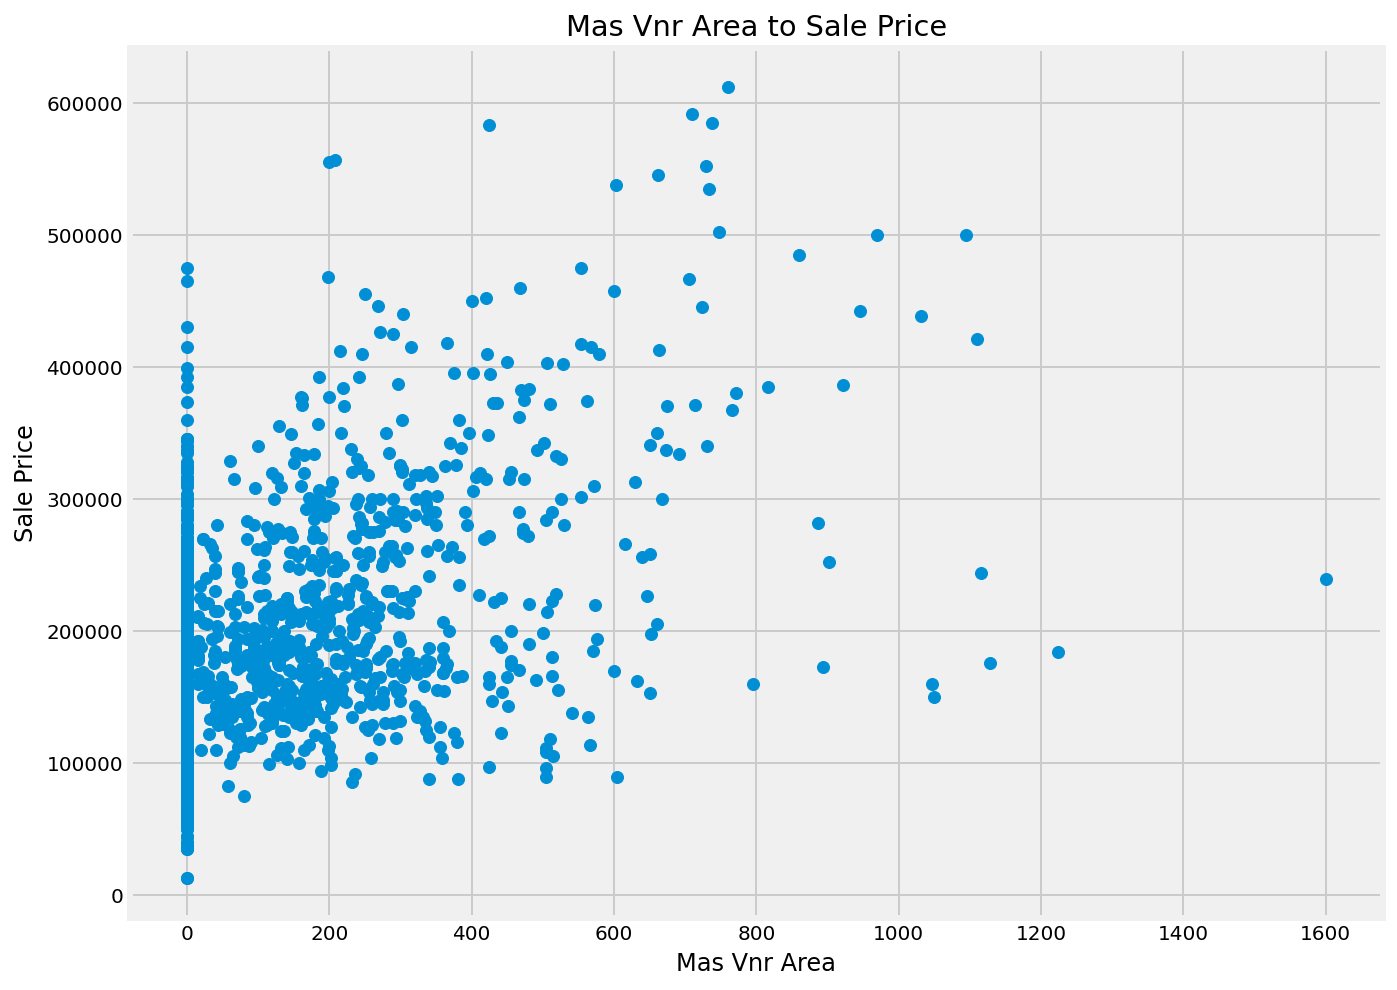

In [101]:
plt.figure(figsize=[10,8])
plt.scatter(train_set['Mas Vnr Area'],train_set['SalePrice']);
plt.title('Mas Vnr Area to Sale Price');
plt.xlabel('Mas Vnr Area');
plt.ylabel('Sale Price');
# There is a linear relationship between Mas Vnr Area and saleprice. There are outliers in Mas Vnr Area

In [102]:
train_set[train_set['Mas Vnr Area']>1500]

Id        PID  MS SubClass  Lot Frontage  Lot Area  House Style  \
1409  1850  533241030           60          66.0      7399            2   

      Overall Qual  Overall Cond  Year Built  Year Remod/Add  ...  \
1409             7            10        1997            1998  ...   

      exterior1_exterior_others exterior2_HdBoard exterior2_MetalSd  \
1409                          0                 0                 0   

     exterior2_Plywood exterior2_VinylSd exterior2_Wd Sdng  \
1409                 0                 1                 0   

     exterior2_exterior_others vnr_none  vnr_stone vnr_other  
1409                         0        0          0         0  

[1 rows x 96 columns]

Text(0, 0.5, 'Sale price')

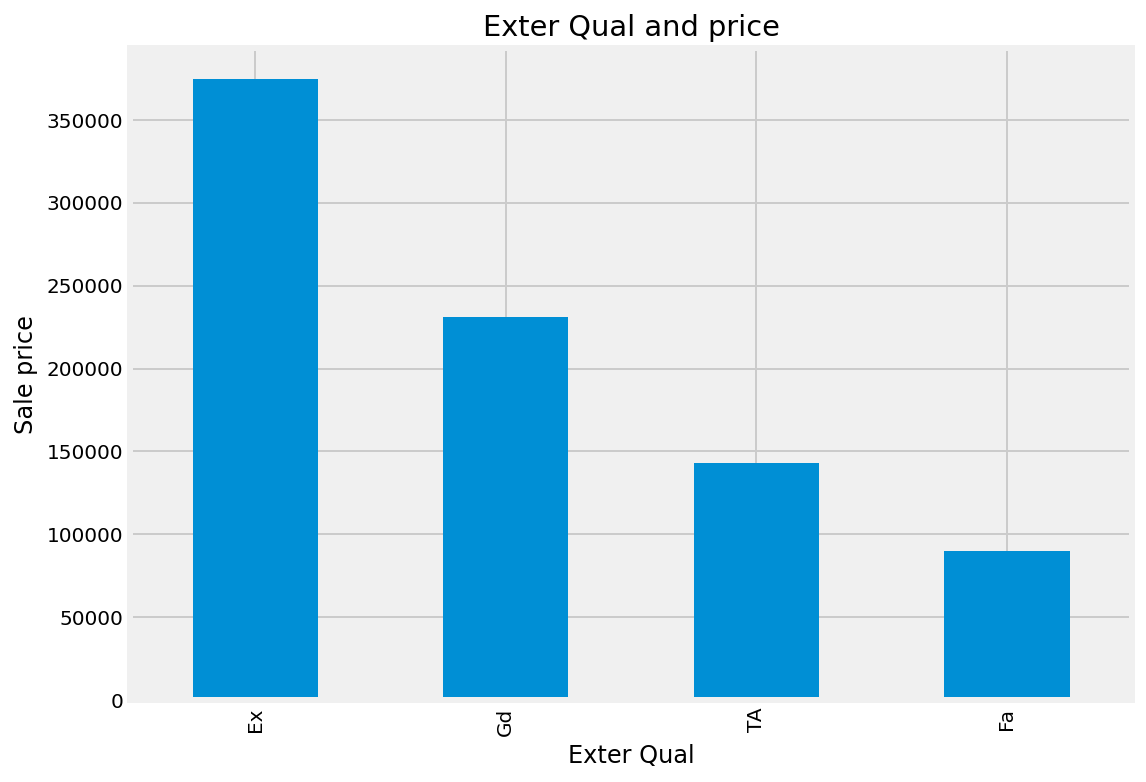

In [103]:
train_set.groupby('Exter Qual')['SalePrice'].mean().sort_values(ascending = False).plot(kind = 'bar',figsize = [8,6]);
plt.title('Exter Qual and price')
plt.ylabel('Sale price')

In [104]:
grade = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po': 1, np.nan: 0}
# Ex : Excellent
# Gd : Good
# TA :Typical
# Fa : Fair
# Po : Poor
# nan : Not applicable

In [105]:
train_set['Exter Qual'] = train_set['Exter Qual'].apply(lambda qual : grade[qual])
test_set['Exter Qual'] = test_set['Exter Qual'].apply(lambda qual : grade[qual])
train_set['Exter Cond'] = train_set['Exter Cond'].apply(lambda qual : grade[qual])
test_set['Exter Cond'] = test_set['Exter Cond'].apply(lambda qual : grade[qual])
# Ranking the quality and Condition of exterior

In [106]:
train_set.groupby('Foundation').count()['Id']
# Will reclass slab, stone and wood into foundation_other

Foundation
BrkTil    221
CBlock    863
PConc     926
Slab       34
Stone       5
Wood        2
Name: Id, dtype: int64

Text(0, 0.5, 'Count')

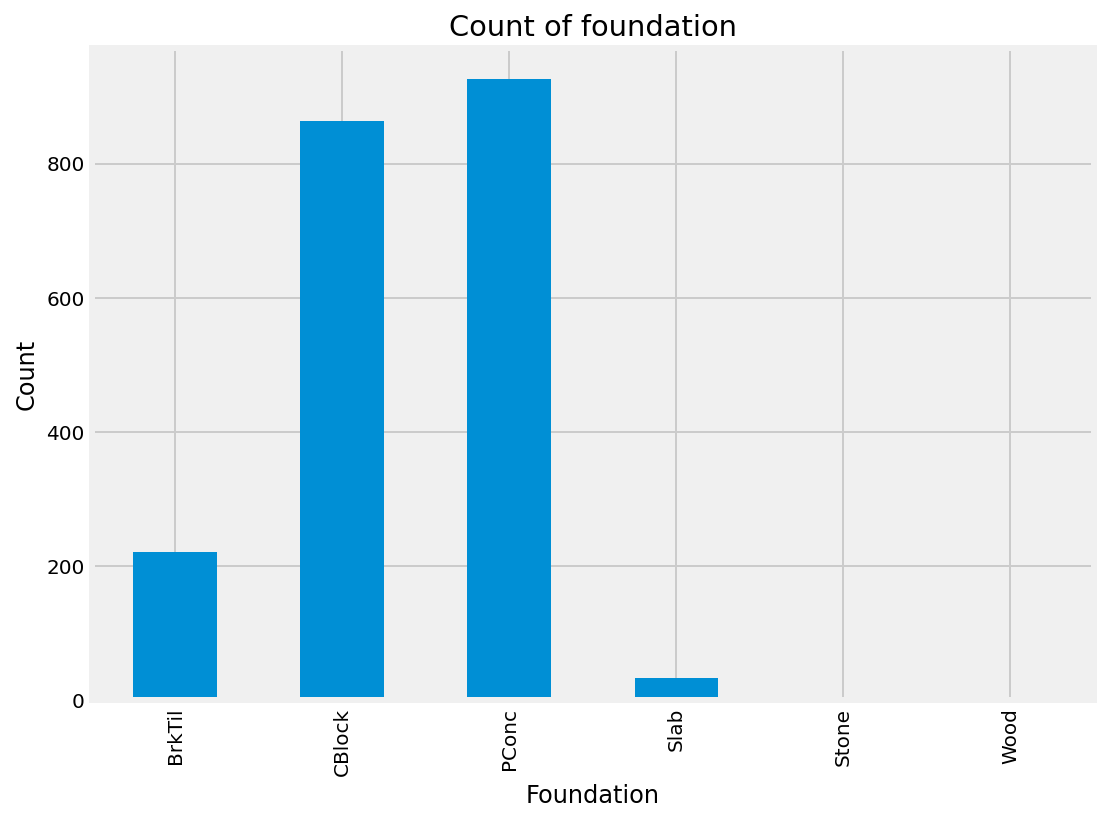

In [107]:
train_set.groupby('Foundation').count()['Id'].plot(kind='bar',figsize = [8,6]);
plt.title('Count of foundation');
plt.ylabel('Count')

In [108]:
train_set['Foundation'] = train_set['Foundation'].apply(lambda foundation : foundation if foundation in ['BrkTil','CBlock','PConc'] else 'foundation_other')
test_set['Foundation'] = test_set['Foundation'].apply(lambda foundation : foundation if foundation in ['BrkTil','CBlock','PConc'] else 'foundation_other')
# Reclass slab, stone and wood into foundation_other

In [109]:
train_set[['foundation_CBlock', 'foundation_PConc', 'foundation_other']] = pd.get_dummies(train_set['Foundation'], drop_first=True)
test_set[['foundation_CBlock', 'foundation_PConc', 'foundation_other']] = pd.get_dummies(test_set['Foundation'], drop_first=True)
# Get dummies for foundation
train_set.drop(columns = ['Foundation'], inplace = True)
test_set.drop(columns = ['Foundation'], inplace = True) # Drop foundation column

In [110]:
train_set['Bsmt Qual'].isna().sum() # There are nan values in basement quality. These properties may not have basement

55

In [111]:
train_set['Bsmt Cond'].isna().sum() # There are nan values in basement condition. These properties may not have basement

55

In [112]:
train_set[train_set['Bsmt Qual'].isna()]['Bsmt Cond'].head()
# The same nan values in basement condition has nan values as basement quality. Likely that these samples do not have basement

12     NaN
93     NaN
114    NaN
146    NaN
183    NaN
Name: Bsmt Cond, dtype: object

In [113]:
train_set['Bsmt Qual'] = train_set['Bsmt Qual'].apply(lambda bsmt_qual : grade[bsmt_qual])
test_set['Bsmt Qual'] = test_set['Bsmt Qual'].apply(lambda bsmt_qual : grade[bsmt_qual])
train_set['Bsmt Cond'] = train_set['Bsmt Cond'].apply(lambda bsmt_con : grade[bsmt_con])
test_set['Bsmt Cond'] = test_set['Bsmt Cond'].apply(lambda bsmt_con : grade[bsmt_con])
# Ranking Basement condition and basement quality. Those with nan values does not have basement

In [114]:
train_set[train_set['Bsmt Exposure'].isna()][['Bsmt Cond','Bsmt Qual']]
# Those without basement have nan values. Except 3 samples with nan values but has basement will further look into it

Bsmt Cond  Bsmt Qual
12            0          0
93            0          0
114           0          0
146           0          0
183           0          0
240           0          0
249           0          0
256           0          0
390           0          0
437           0          0
485           0          0
499           0          0
514           0          0
580           0          0
581           0          0
616           0          0
635           0          0
642           0          0
696           0          0
700           0          0
737           0          0
772           0          0
790           0          0
794           0          0
924           0          0
933           0          0
954           0          0
1007          0          0
1022          0          0
1049          0          0
1089          0          0
1098          0          0
1125          0          0
1157          0          0
1211          0          0
1222          0          0
1252          0          0
1256          0          0
1270          0          0
1327          0          0
1331          0          0
1377          0          0
1387          0          0
1428          0          0
1456          3          4
1481          0          0
1547          3          4
1594          0          0
1620          0          0
1681          0          0
1684          0          0
1686          0          0
1859          0          0
1875          0          0
1889          0          0
1933          0          0
1997          3          4
2010          0          0

In [115]:
train_set.groupby(['Bsmt Cond','Bsmt Exposure']).count()[['Id']].groupby(level=0, group_keys = False).apply(lambda x : x.sort_values(by = 'Id', ascending = False))
# Will group those without basement as the same group as those with 'No' exposure.
# those with basesment but has nan value, will be grouped together with 'No' as most of the same basement class has no exposure

Id
Bsmt Cond Bsmt Exposure      
1         No                4
          Gd                1
2         No               58
          Mn                6
          Gd                1
3         No             1229
          Av              272
          Gd              182
          Mn              148
4         No               47
          Gd               19
          Av               15
          Mn                8
5         Av                1
          Mn                1
          No                1

In [116]:
train_set['Bsmt Exposure'] = train_set['Bsmt Exposure'].apply(lambda exposure : exposure if exposure in ['Gd','Av','Mn','No'] else 'No')
test_set['Bsmt Exposure'] = test_set['Bsmt Exposure'].apply(lambda exposure : exposure if exposure in ['Gd','Av','Mn','No'] else 'No')
# regrouping nan values

In [117]:
grade_exposure = {'Gd' : 3, 'Av' : 2, 'Mn' : 1, 'No': 0}
#  Gd : Good
#  Av : Average
#  Mn : Minimal
#  No : No basement

In [118]:
train_set['Bsmt Exposure'] = train_set['Bsmt Exposure'].apply(lambda exposure : grade_exposure[exposure])
test_set['Bsmt Exposure'] = test_set['Bsmt Exposure'].apply(lambda exposure : grade_exposure[exposure])
# ranking the basement exposure

In [119]:
train_set[train_set['BsmtFin Type 1'].isna()]['Bsmt Cond'].head() # nan values in basement finish type 1 have no basement

12     0
93     0
114    0
146    0
183    0
Name: Bsmt Cond, dtype: int64

In [120]:
train_set.groupby('BsmtFin Type 1').mean()['BsmtFin SF 1'].sort_values()

BsmtFin Type 1
Unf      0.000000
LwQ    358.872549
Rec    474.163934
BLQ    533.150000
ALQ    623.563140
GLQ    803.260163
Name: BsmtFin SF 1, dtype: float64

In [121]:
grade_basementfin = {'GLQ' : 6, 'ALQ' : 5, 'BLQ' : 4, 'Rec' : 3, 'LwQ' : 2, 'Unf' : 1, np.nan : 0}
# ranking the basement finish
# GLQ : Good living quarters
# ALQ : average living quarters
# BLQ : below avg living quarters
# REC : recreation room
# LWQ : low quality
# Unf : unfinished
# nan : no basement

In [122]:
train_set['BsmtFin Type 1'] = train_set['BsmtFin Type 1'].apply(lambda finish : grade_basementfin[finish])
test_set['BsmtFin Type 1'] = test_set['BsmtFin Type 1'].apply(lambda finish : grade_basementfin[finish])
# ranking the basement finishing type 1

In [123]:
train_set[train_set['BsmtFin SF 1'].isna()].iloc[:,13:18] # Nan value for this field is 0 as there is no basement

Bsmt Qual  Bsmt Cond  Bsmt Exposure  BsmtFin Type 1  BsmtFin SF 1
1327          0          0              0               0           NaN

In [124]:
train_set['BsmtFin SF 1'] = train_set['BsmtFin SF 1'].apply(lambda bsmtfin_sf : 0 if np.isnan(bsmtfin_sf) else bsmtfin_sf)
# Replacing nan values to 0

In [125]:
train_set.groupby('BsmtFin Type 2').mean()['BsmtFin SF 2'].sort_values()

BsmtFin Type 2
Unf      0.003431
BLQ    318.875000
LwQ    325.583333
Rec    352.500000
ALQ    530.685714
GLQ    705.043478
Name: BsmtFin SF 2, dtype: float64

In [126]:
train_set[train_set['BsmtFin Type 2'].isna()].iloc[:,13:20].loc[1147]
# The nan value is an error will add this as 'ALQ' as the square ft is closest to its mean

Bsmt Qual            4
Bsmt Cond            3
Bsmt Exposure        0
BsmtFin Type 1       6
BsmtFin SF 1      1124
BsmtFin Type 2     NaN
BsmtFin SF 2       479
Name: 1147, dtype: object

In [127]:
train_set.loc[1147,['BsmtFin Type 2']] = train_set.loc[1147,['BsmtFin Type 2']].apply(lambda x : 'ALQ')

In [128]:
train_set[train_set['BsmtFin Type 2'].isna()].iloc[:,13:20].head() # Remaining nan fields in BsmtFin Type 2 will be 0

Bsmt Qual  Bsmt Cond  Bsmt Exposure  BsmtFin Type 1  BsmtFin SF 1  \
12           0          0              0               0           0.0   
93           0          0              0               0           0.0   
114          0          0              0               0           0.0   
146          0          0              0               0           0.0   
183          0          0              0               0           0.0   

    BsmtFin Type 2  BsmtFin SF 2  
12             NaN           0.0  
93             NaN           0.0  
114            NaN           0.0  
146            NaN           0.0  
183            NaN           0.0

In [129]:
train_set['BsmtFin Type 2'] = train_set['BsmtFin Type 2'].apply(lambda finish : grade_basementfin[finish])
test_set['BsmtFin Type 2'] = test_set['BsmtFin Type 2'].apply(lambda finish : grade_basementfin[finish])
# ranking the basement finishing type 2

In [130]:
train_set.isna().sum()[19:32]

BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     2
Bsmt Half Bath     2
dtype: int64

In [131]:
train_set[train_set['Bsmt Full Bath'].isna()][['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']]
# These samples does not have basement

Bsmt Qual  Bsmt Cond  Bsmt Exposure  BsmtFin SF 2  Bsmt Unf SF  \
616           0          0              0           0.0          0.0   
1327          0          0              0           NaN          NaN   

      Total Bsmt SF  Bsmt Full Bath  Bsmt Half Bath  
616             0.0             NaN             NaN  
1327            NaN             NaN             NaN

In [132]:
train_set['BsmtFin SF 2'] = train_set['BsmtFin SF 2'].apply(lambda bsmfin : 0 if np.isnan(bsmfin) else bsmfin)
train_set['Bsmt Unf SF'] = train_set['Bsmt Unf SF'].apply(lambda bsmfin : 0 if np.isnan(bsmfin) else bsmfin)
train_set['Total Bsmt SF'] = train_set['Total Bsmt SF'].apply(lambda bsmfin : 0 if np.isnan(bsmfin) else bsmfin)
train_set['Bsmt Full Bath'] = train_set['Bsmt Full Bath'].apply(lambda bsmfin : 0 if np.isnan(bsmfin) else bsmfin)
train_set['Bsmt Half Bath'] = train_set['Bsmt Half Bath'].apply(lambda bsmfin : 0 if np.isnan(bsmfin) else bsmfin)
# replacing nan value with 0

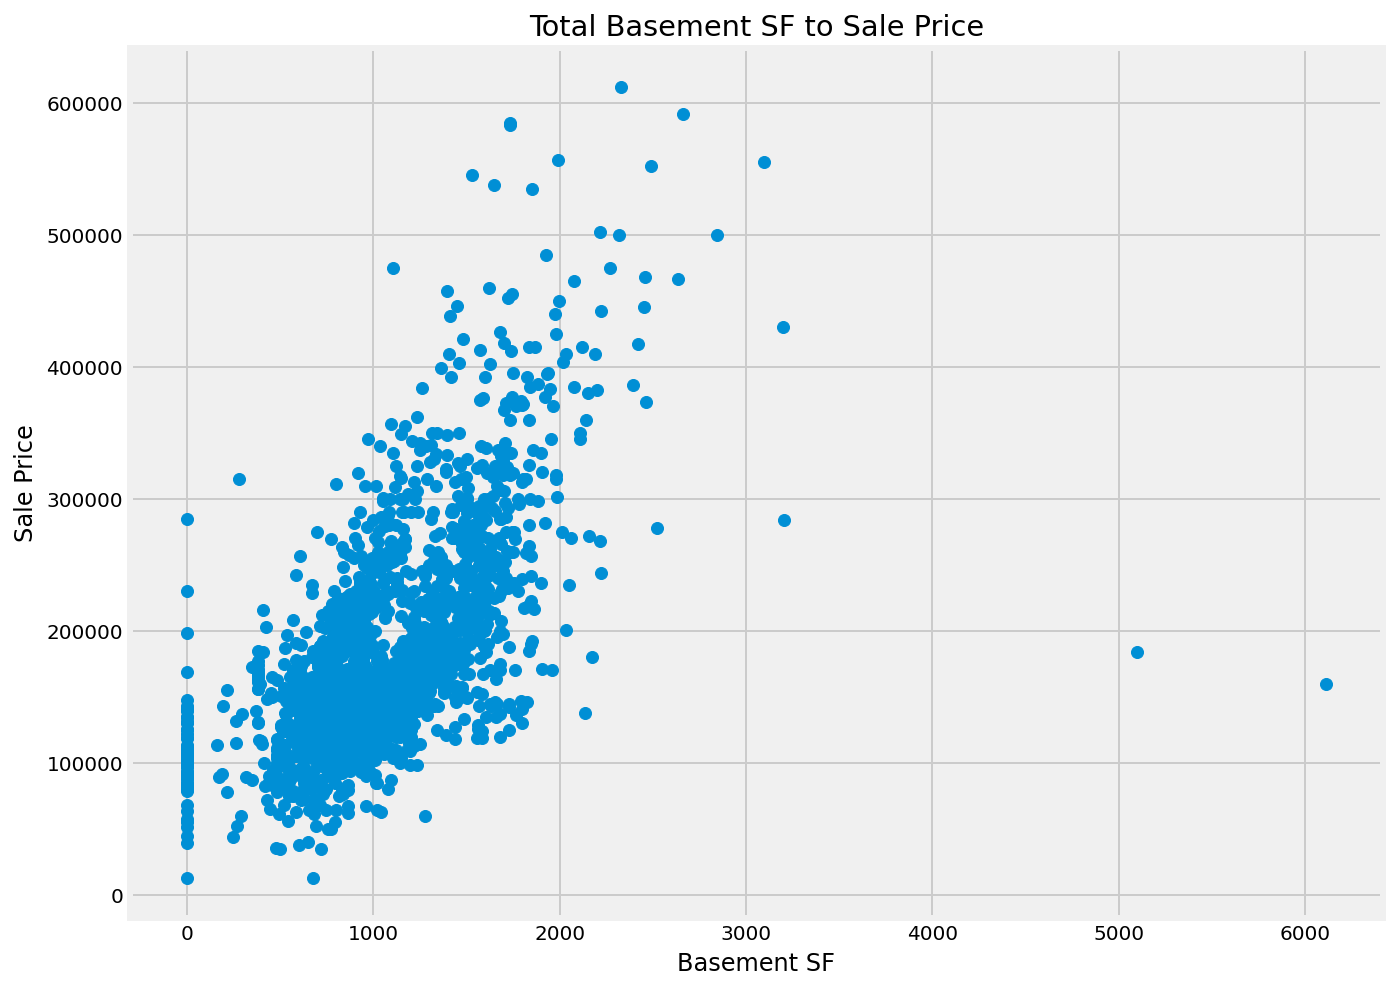

In [133]:
plt.figure(figsize=[10,8]);
plt.scatter(train_set['Total Bsmt SF'],train_set['SalePrice']);
plt.title('Total Basement SF to Sale Price');
plt.xlabel('Basement SF');
plt.ylabel('Sale Price');
# There is a linear relationship between Basement Sf and saleprice. There are outliers in basement SF

In [134]:
train_set = train_set[train_set['Total Bsmt SF']<5000]
# removing samples that has total basement SF above 5000

In [135]:
train_set.groupby('Heating').count()['Id'] # Most properties are using Gas for heating. Will drop the entire column

Heating
GasA    2016
GasW      20
Grav       5
OthW       2
Wall       6
Name: Id, dtype: int64

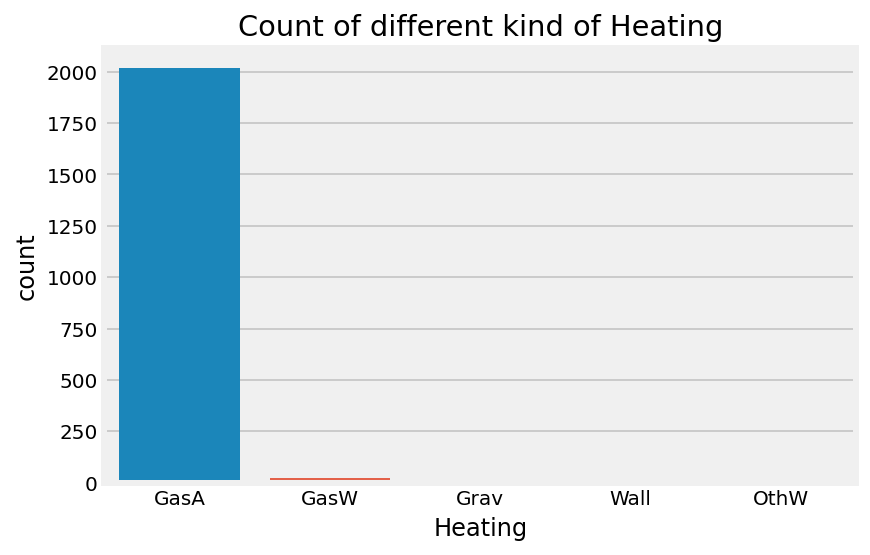

In [136]:
sns.countplot(x='Heating', data = train_set);
plt.title('Count of different kind of Heating');

In [137]:
train_set.drop(columns = 'Heating', inplace = True)
test_set.drop(columns = 'Heating', inplace = True) # Dropping utilities column as it does not help in our model prediction

In [138]:
train_set['Heating QC'] = train_set['Heating QC'].apply(lambda qc : grade[qc])
test_set['Heating QC'] = test_set['Heating QC'].apply(lambda qc : grade[qc])
# Ranking the quality and Condition of heating

In [139]:
train_set['Central Air'] = pd.get_dummies(train_set['Central Air'], drop_first = True)
test_set['Central Air'] = pd.get_dummies(test_set['Central Air'], drop_first = True)
# Get dummies for central air and replace existing fields as 1 for 'Y' and 0 for 'N'

In [140]:
train_set.groupby('Electrical').count()['Id'] # Will group those other than FuseA and SBrkr

Electrical
FuseA     140
FuseF      35
FuseP       7
Mix         1
SBrkr    1866
Name: Id, dtype: int64

In [141]:
train_set['Electrical'] = train_set['Electrical'].apply(lambda elect : elect if elect in ['FuseA','SBrkr'] else 'elect_other')
test_set['Electrical'] = test_set['Electrical'].apply(lambda elect : elect if elect in ['FuseA','SBrkr'] else 'elect_other')
# group those other than FuseA and SBrkr to elect_other

In [142]:
train_set[['elect_SBrkr', 'elect_other']] = pd.get_dummies(train_set['Electrical'], drop_first = True)
test_set[['elect_SBrkr', 'elect_other']] = pd.get_dummies(test_set['Electrical'], drop_first = True)
# get dummies and create columns
train_set.drop(columns = ['Electrical'], inplace = True)
test_set.drop(columns = ['Electrical'], inplace = True)
# Drop Electrical columns

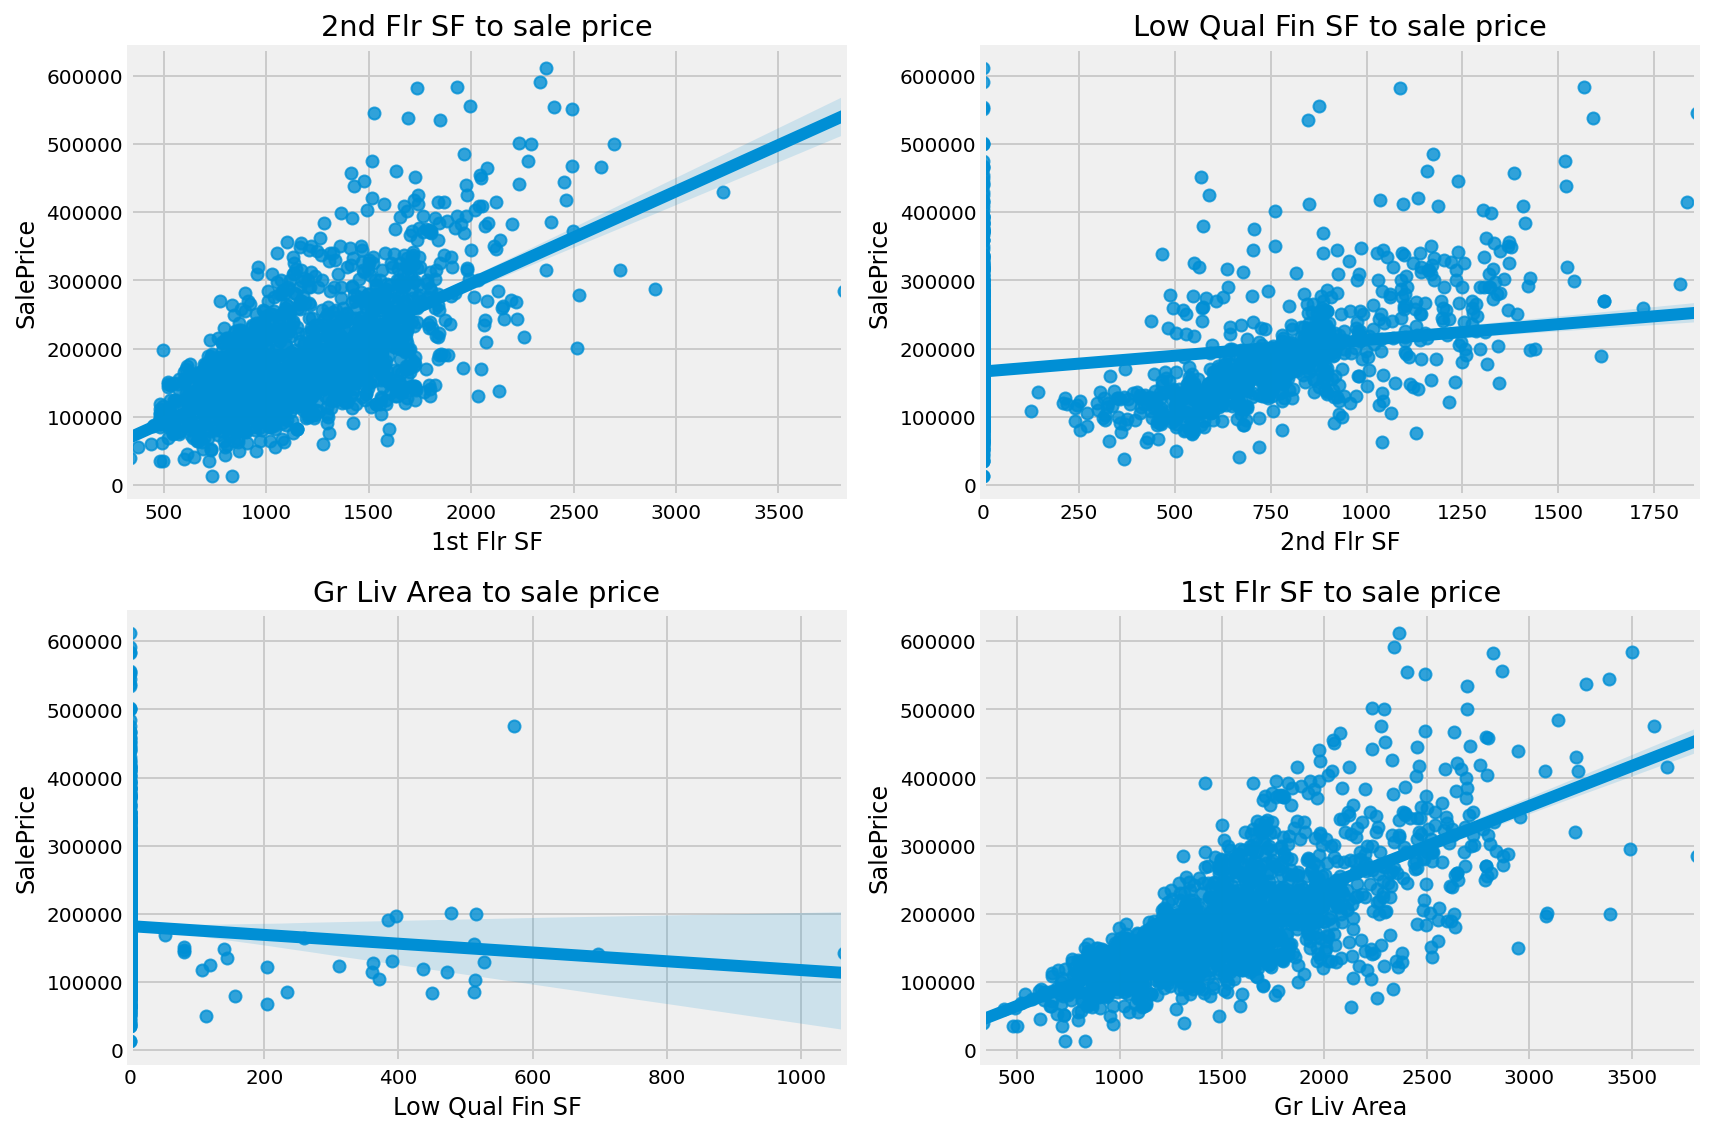

In [143]:
sf_lst=['1st Flr SF','2nd Flr SF','Low Qual Fin SF','Gr Liv Area']
def sale_sf(sfsale):
    fig, ax = plt.subplots(2,2, figsize=[12,8])
    ax=ax.ravel()
    for i,j in enumerate(sfsale):
        sns.regplot(x=j, y = 'SalePrice', data = train_set,ax=ax[i])
        ax[i-1].set_title(j+' to sale price')
    fig.tight_layout()
sale_sf(sf_lst)

In [144]:
train_set = train_set[(train_set['Gr Liv Area']<5000) & (train_set['1st Flr SF']<3500)]
# GR Liv Area and 1st Flr SF are highly correlated to Saleprice. There are outliers with high built size but low sale price
# drop Gr Liv Area > 50000 and 1st Flr SF >3500 as there are samples with those parameters but low SalePrice

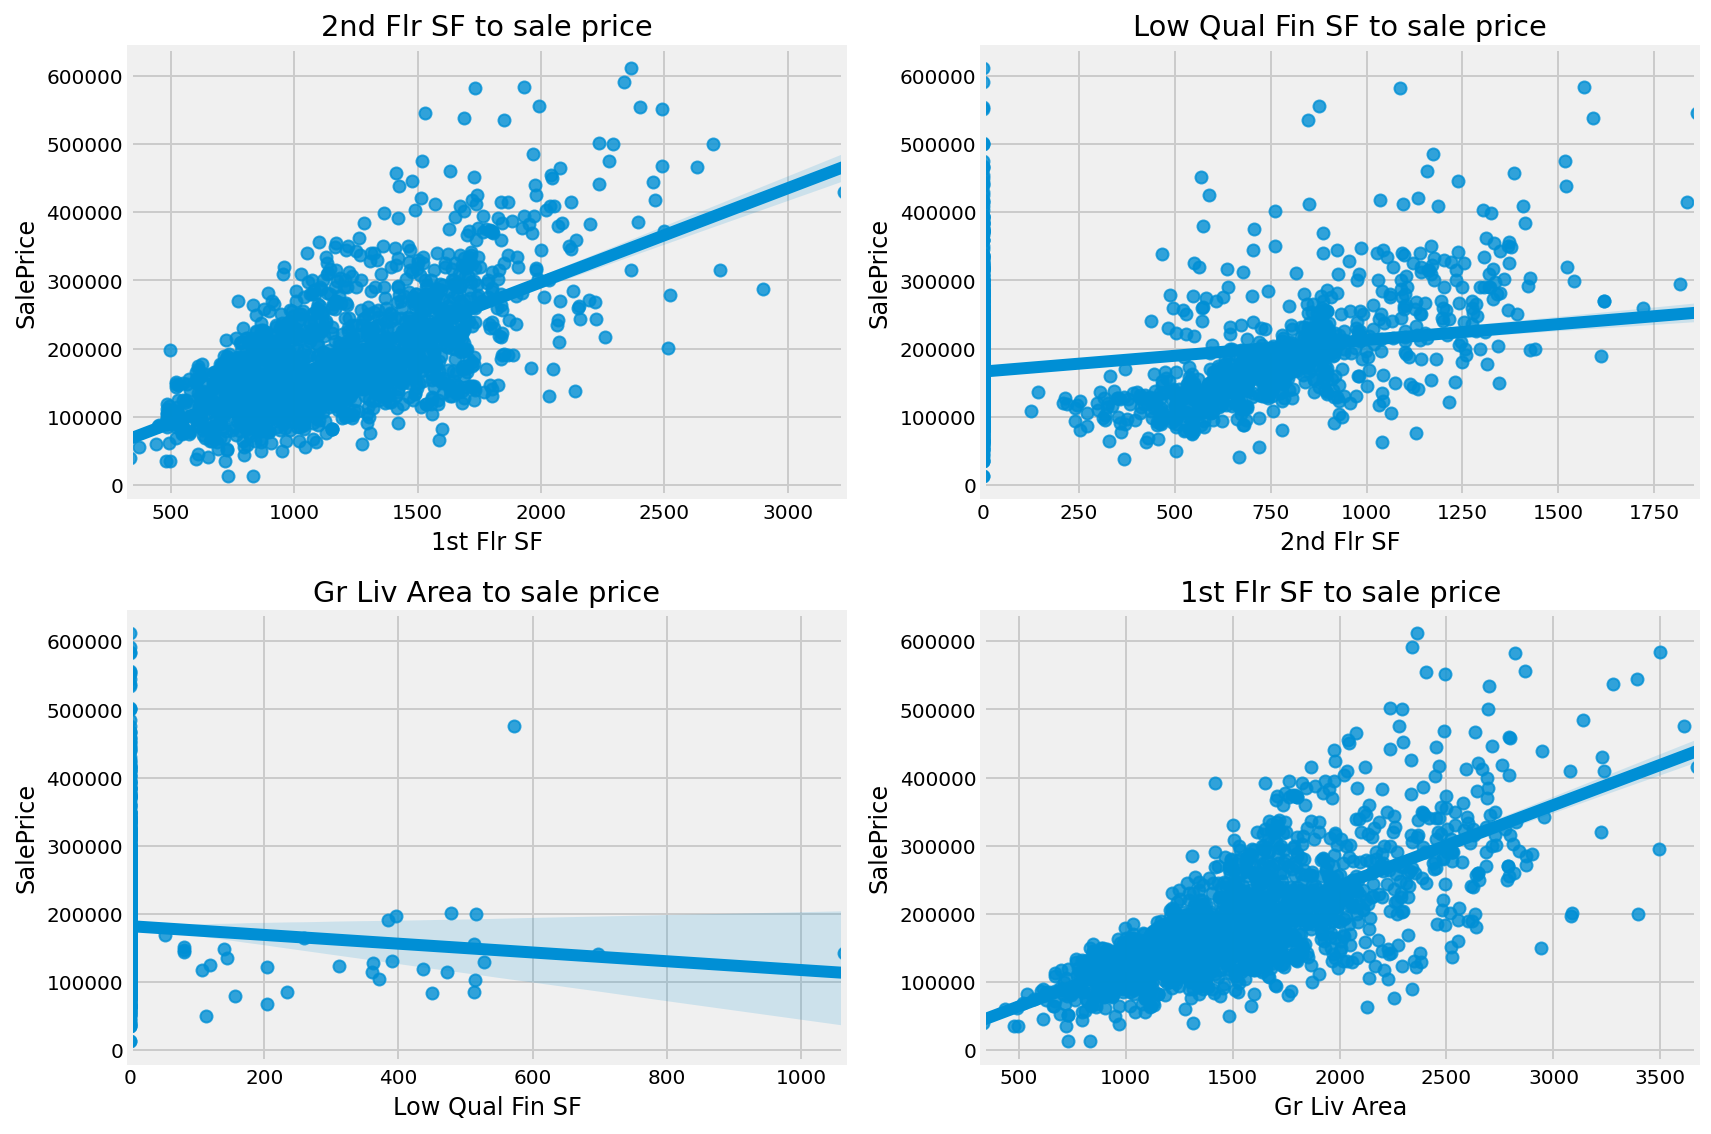

In [145]:
sf_lst=['1st Flr SF','2nd Flr SF','Low Qual Fin SF','Gr Liv Area']
def sale_sf(sfsale):
    fig, ax = plt.subplots(2,2, figsize=[12,8])
    ax=ax.ravel()
    for i,j in enumerate(sfsale):
        sns.regplot(x=j, y = 'SalePrice', data = train_set,ax=ax[i])
        ax[i-1].set_title(j+' to sale price')
    fig.tight_layout()
sale_sf(sf_lst)

In [146]:
train_set['Kitchen Qual']

0       Gd
1       Gd
2       Gd
3       TA
4       TA
        ..
2046    Gd
2047    TA
2048    TA
2049    TA
2050    Gd
Name: Kitchen Qual, Length: 2048, dtype: object

In [147]:
train_set['Kitchen Qual'] = train_set['Kitchen Qual'].apply(lambda kitchen : grade[kitchen])
test_set['Kitchen Qual'] = test_set['Kitchen Qual'].apply(lambda kitchen : grade[kitchen])
# ranking kitchen quality

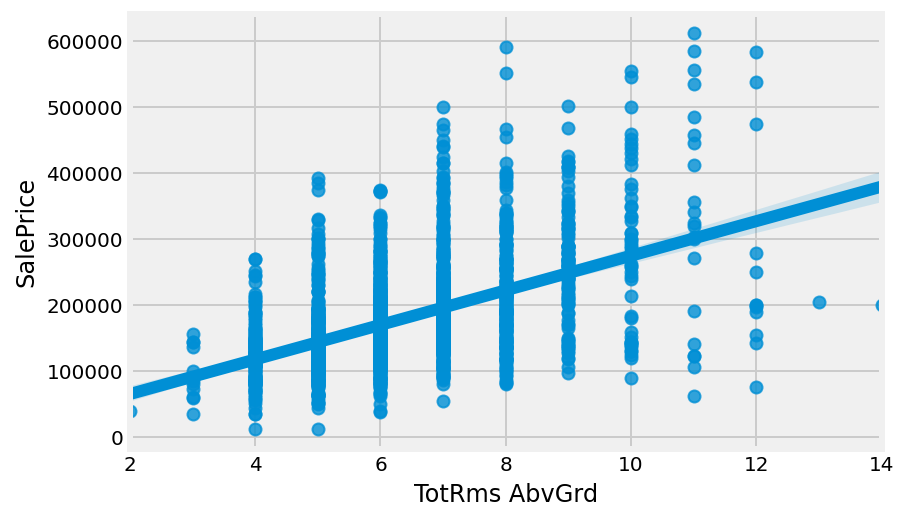

In [148]:
sns.regplot(x='TotRms AbvGrd',y='SalePrice',data=train_set);
# Relatively strong relationship between Rooms abv ground and saleprice

In [149]:
functional_rank = {'Sal' : 0, 'Sev' : 1,'Maj2' : 2, 'Maj1' : 3, 'Mod' : 4, 'Min2' : 5, 'Min1' : 6, 'Typ' : 7}
# Min1 : Minor Deductions 1
# Min2 : Minor Deductions 2
# Mod : Moderate Deductions
# Maj1 : Major Deductions 1
# Maj2 : Major Deductions 2
# Sev : Severely Damaged
# Sal : Salvage only

In [150]:
train_set['Functional'] = train_set['Functional'].apply(lambda function : functional_rank[function])
test_set['Functional'] = test_set['Functional'].apply(lambda function : functional_rank[function])
# ranking functional quality

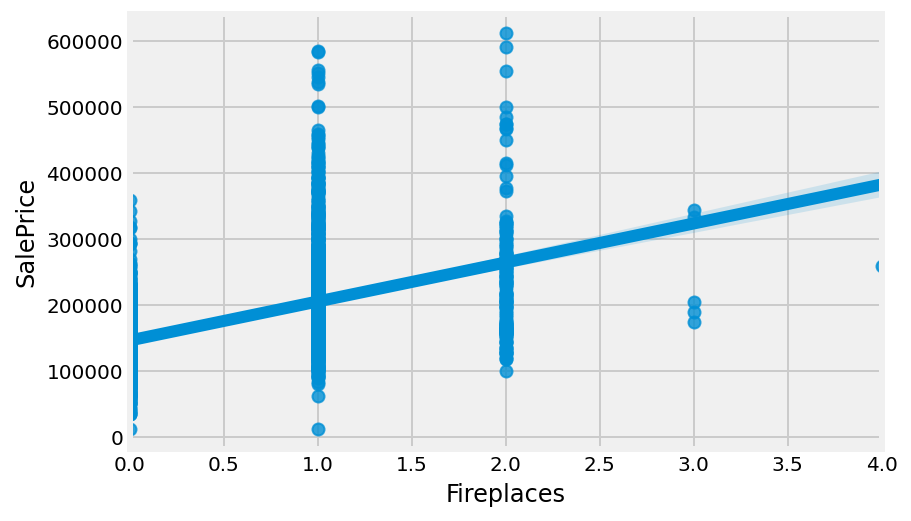

In [151]:
sns.regplot(x='Fireplaces',y='SalePrice',data=train_set);
# Number of fireplace is somewhat coorelated to price

In [152]:
train_set['Garage Type'].isna().sum()

113

In [153]:
train_set[train_set['Garage Type'].isna()][['Garage Type','Garage Yr Blt','Garage Finish']].head()
# Those without garage is nan

Garage Type  Garage Yr Blt Garage Finish
28          NaN            NaN           NaN
53          NaN            NaN           NaN
65          NaN            NaN           NaN
79          NaN            NaN           NaN
101         NaN            NaN           NaN

In [154]:
train_set['Garage Type'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'Basment', nan, '2Types', 'CarPort'],
      dtype=object)

In [155]:
train_set['Garage Type'] = train_set['Garage Type'].apply(lambda garage : garage if type(garage)==str else 'no_garage')
test_set['Garage Type'] = test_set['Garage Type'].apply(lambda garage : garage if type(garage)==str else 'no_garage')
# replacing nan values to no_garage

In [156]:
train_set.groupby('Garage Type').count()['Id']
# Will group 2Types, Basement and CarPort as other_garage_types

Garage Type
2Types         19
Attchd       1210
Basment        27
BuiltIn       132
CarPort        11
Detchd        536
no_garage     113
Name: Id, dtype: int64

In [157]:
def garage_func(gtype, year): #function to change year built to 0 for those without basement
    if gtype == 'no_garage':
        return 0
    else:
        return year

In [158]:
train_set['Garage Yr Blt'] = train_set.apply(lambda set : garage_func(set['Garage Type'],set['Garage Yr Blt']),axis = 1)
test_set['Garage Yr Blt'] = test_set.apply(lambda set : garage_func(set['Garage Type'],set['Garage Yr Blt']),axis = 1)
# Samples with no basement will have the value 0 for year built

In [159]:
def garage_func(gtype, finish): #function to change garage finish to NA for those without basement
    if gtype == 'no_garage':
        return 'NA'
    else:
        return finish

In [160]:
train_set['Garage Finish'] = train_set.apply(lambda set : garage_func(set['Garage Type'],set['Garage Finish']),axis = 1)
test_set['Garage Finish'] = test_set.apply(lambda set : garage_func(set['Garage Type'],set['Garage Finish']),axis = 1)
# Samples with no basement will have the value NA for finish

In [161]:
train_set[train_set['Garage Finish'].isna()][['Garage Type','Garage Yr Blt','Garage Finish']]
# Will take the average garrage year built and the most count of finish for Detchd garrage type

Garage Type  Garage Yr Blt Garage Finish
1712      Detchd            NaN           NaN

In [162]:
test_set[test_set['Garage Finish'].isna()][['Garage Type','Garage Yr Blt','Garage Finish']]

Garage Type  Garage Yr Blt Garage Finish
765      Detchd            NaN           NaN

In [163]:
train_set.groupby('Garage Type').mean()['Garage Yr Blt'] # Will give 1962 as built year

Garage Type
2Types       1966.526316
Attchd       1984.642975
Basment      1964.148148
BuiltIn      1996.901515
CarPort      1960.636364
Detchd       1962.261682
no_garage       0.000000
Name: Garage Yr Blt, dtype: float64

In [164]:
train_set.groupby(['Garage Type','Garage Finish']).count()[['Id']].sort_values(by='Id', ascending = False)
# Will give Unf as finish

Id
Garage Type Garage Finish     
Attchd      RFn            508
Detchd      Unf            497
Attchd      Fin            393
            Unf            309
no_garage   NA             113
BuiltIn     Fin             88
            RFn             37
Detchd      RFn             24
            Fin             14
2Types      Unf             13
CarPort     Unf             11
Basment     Unf             11
            Fin             10
BuiltIn     Unf              7
Basment     RFn              6
2Types      RFn              4
            Fin              2

In [165]:
train_set.loc[1712,['Garage Yr Blt']] = train_set.loc[1712,['Garage Yr Blt']].apply(lambda year : 1962)
train_set.loc[1712,['Garage Finish']] = train_set.loc[1712,['Garage Finish']].apply(lambda year : 'Unf')
test_set.loc[765,['Garage Yr Blt']] = test_set.loc[765,['Garage Yr Blt']].apply(lambda year : 1962)
test_set.loc[765,['Garage Finish']] = test_set.loc[765,['Garage Finish']].apply(lambda year : 'Unf')
# Replacing the nan values

In [166]:
train_set.loc[1712,['Garage Type','Garage Yr Blt','Garage Finish']] # Replaced nan values

Garage Type      Detchd
Garage Yr Blt      1962
Garage Finish       Unf
Name: 1712, dtype: object

In [167]:
test_set.loc[765,['Garage Type','Garage Yr Blt','Garage Finish']] # Replaced nan values

Garage Type      Detchd
Garage Yr Blt      1962
Garage Finish       Unf
Name: 765, dtype: object

In [168]:
train_set[train_set['Garage Cars'].isna()][['Garage Type','Garage Yr Blt','Garage Finish','Garage Cars','Garage Area']]

Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area
1712      Detchd         1962.0           Unf          NaN          NaN

In [169]:
train_set.groupby(['Garage Type']).mean()['Garage Cars'] # Will input 2 cars as Garage Area for missing value

Garage Type
2Types       2.842105
Attchd       1.967769
Basment      1.555556
BuiltIn      2.318182
CarPort      1.636364
Detchd       1.558879
no_garage    0.000000
Name: Garage Cars, dtype: float64

In [170]:
train_set.groupby(['Garage Type']).mean()['Garage Area'] # Will input 419 as Garage Area for missing value

Garage Type
2Types       799.210526
Attchd       526.280992
Basment      435.592593
BuiltIn      567.681818
CarPort      426.818182
Detchd       419.543925
no_garage      0.000000
Name: Garage Area, dtype: float64

In [171]:
train_set.loc[1712,['Garage Cars']] = train_set.loc[1712,['Garage Cars']].apply(lambda year : 2.0)
train_set.loc[1712,['Garage Area']] = train_set.loc[1712,['Garage Area']].apply(lambda year : 419.0)
# Replacing the nan values

In [172]:
train_set.loc[1712,['Garage Cars','Garage Area']] # Replaced nan values

Garage Cars      2
Garage Area    419
Name: 1712, dtype: object

In [173]:
train_set['Garage Yr Blt'] = train_set['Garage Yr Blt'].apply(lambda year : year if year < pd.to_datetime('today').year else pd.to_datetime('today').year)
test_set['Garage Yr Blt'] = test_set['Garage Yr Blt'].apply(lambda year : year if year < pd.to_datetime('today').year else pd.to_datetime('today').year)
# making sure the garage year built does not exceed today year

In [174]:
train_set[train_set['Garage Qual'].isna()][['Garage Type','Garage Qual','Garage Cond']].head()
# Samples with no garage have nan values for Garage Qual and Garage Cond 

Garage Type Garage Qual Garage Cond
28    no_garage         NaN         NaN
53    no_garage         NaN         NaN
65    no_garage         NaN         NaN
79    no_garage         NaN         NaN
101   no_garage         NaN         NaN

In [175]:
train_set['Garage Qual'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Ex', 'Po'], dtype=object)

In [176]:
train_set['Garage Qual'] = train_set['Garage Qual'].apply(lambda gqual : grade[gqual])
test_set['Garage Qual'] = test_set['Garage Qual'].apply(lambda gqual : grade[gqual])
# ranked Garage Qual and those with nan values are given 0 in rank

In [177]:
train_set['Garage Cond'] = train_set['Garage Cond'].apply(lambda gcond : grade[gcond])
test_set['Garage Cond'] = test_set['Garage Cond'].apply(lambda gcond : grade[gcond])
# ranked Garage Cond and those with nan values are given 0 in rank

In [178]:
train_set['Garage Type'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'no_garage', '2Types',
       'CarPort'], dtype=object)

In [179]:
train_set['Garage Type'] = train_set['Garage Type'].apply(lambda garage : garage if garage in ['Attchd','BuiltIn','Detchd','no_garage'] else 'other_garage_types')
test_set['Garage Type'] = test_set['Garage Type'].apply(lambda garage : garage if garage in ['Attchd','BuiltIn','Detchd','no_garage'] else 'other_garage_types')

In [180]:
train_set[['garage_type_BuiltIn', 'garage_type_Detchd','garage_type_no', 'garage_type_other']] = pd.get_dummies(train_set['Garage Type'], drop_first = True)
test_set[['garage_type_BuiltIn', 'garage_type_Detchd','garage_type_no', 'garage_type_other']] = pd.get_dummies(test_set['Garage Type'], drop_first = True)
# Get dummies for garage type
train_set.drop(columns = 'Garage Type', inplace = True)
test_set.drop(columns = 'Garage Type', inplace = True)
# Drop Garage type column

In [181]:
train_set[['garrage_finish_NA', 'garrage_finish_RFn', 'garrage_finish_Unf']] = pd.get_dummies(train_set['Garage Finish'], drop_first = True)
test_set[['garrage_finish_NA', 'garrage_finish_RFn', 'garrage_finish_Unf']] = pd.get_dummies(test_set['Garage Finish'], drop_first = True)
# create dummies for garrage finish
train_set.drop(columns = 'Garage Finish', inplace = True)
test_set.drop(columns = 'Garage Finish', inplace = True)
# Drop Garage Finish column

In [182]:
train_set[['Paved_Drive_P','Paved_Drive_Y']] = pd.get_dummies(train_set['Paved Drive'], drop_first = True)
test_set[['Paved_Drive_P','Paved_Drive_Y']] = pd.get_dummies(test_set['Paved Drive'], drop_first = True)
# create dummies for Paved Drive
train_set.drop(columns = 'Paved Drive', inplace = True)
test_set.drop(columns = 'Paved Drive', inplace = True)
# Drop Paved Drive column

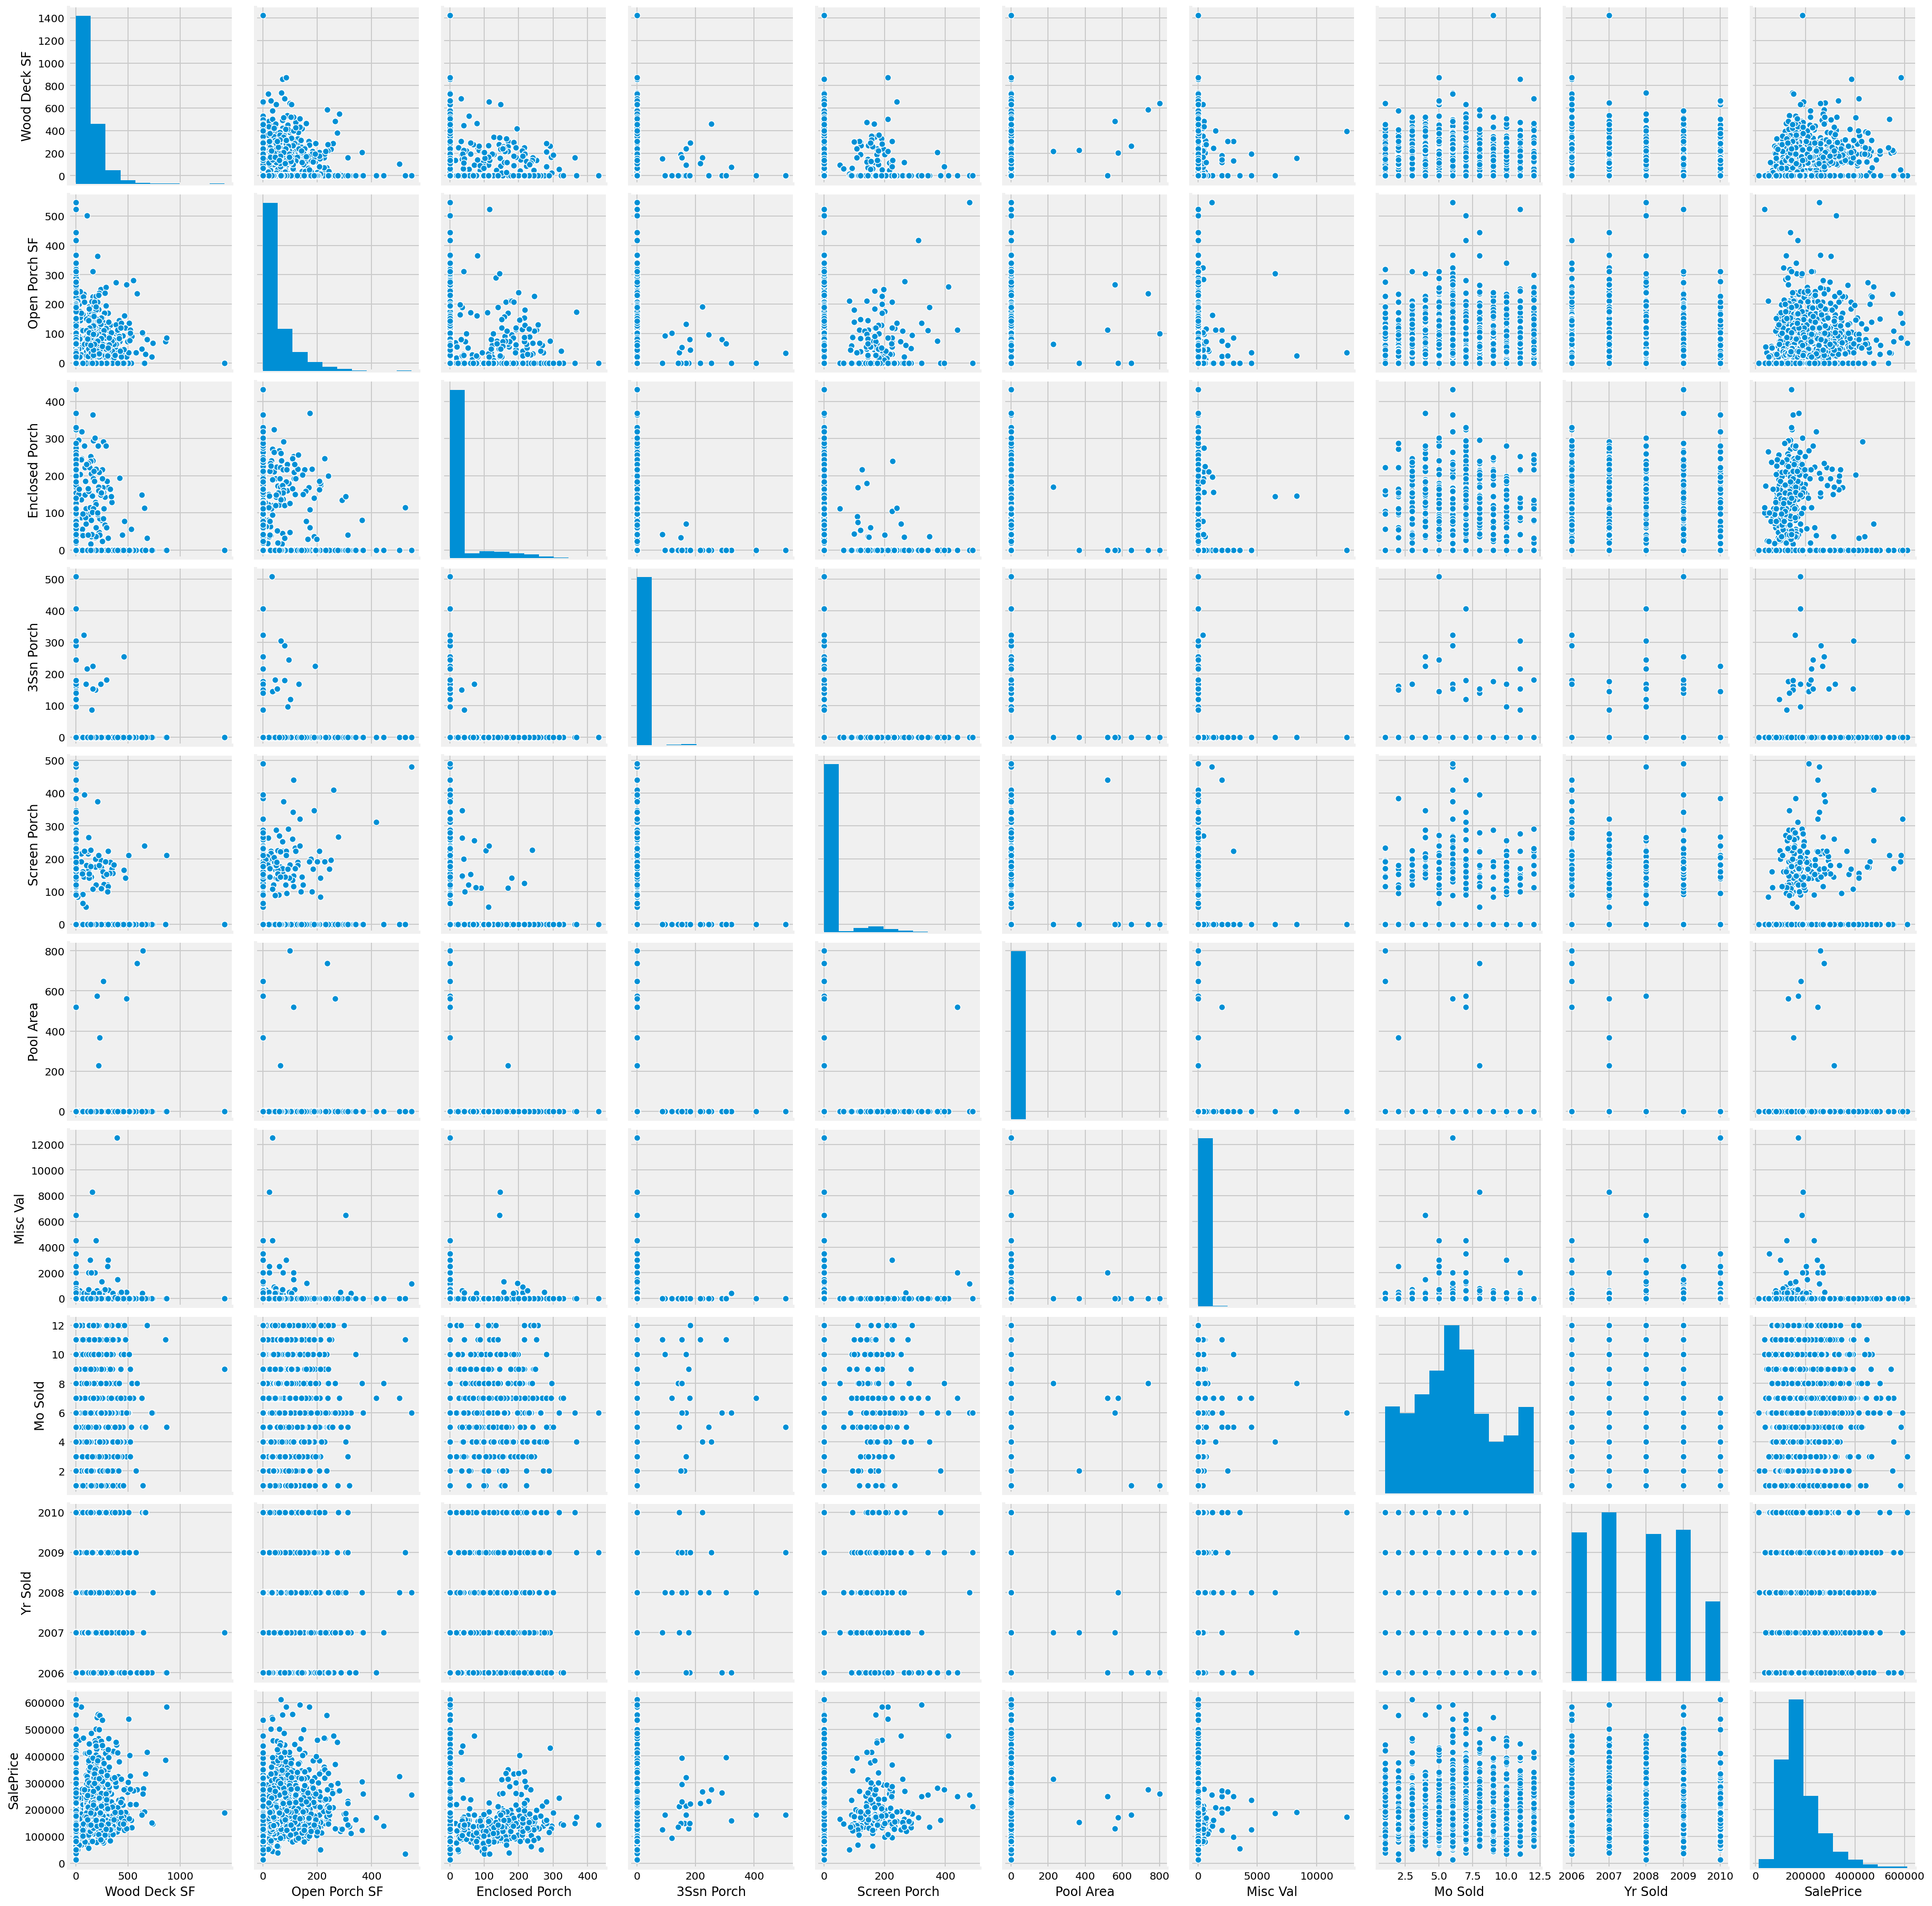

In [183]:
sns.pairplot(train_set.iloc[:,43:54]);

In [184]:
train_set.groupby('Sale Type').count()['Id'] # Anything other than 'COD','New','WD' will be classified as sale_type_other

Sale Type
COD        63
CWD        10
Con         4
ConLD      17
ConLI       7
ConLw       5
New       158
Oth         4
WD       1780
Name: Id, dtype: int64

Text(0, 0.5, 'Count')

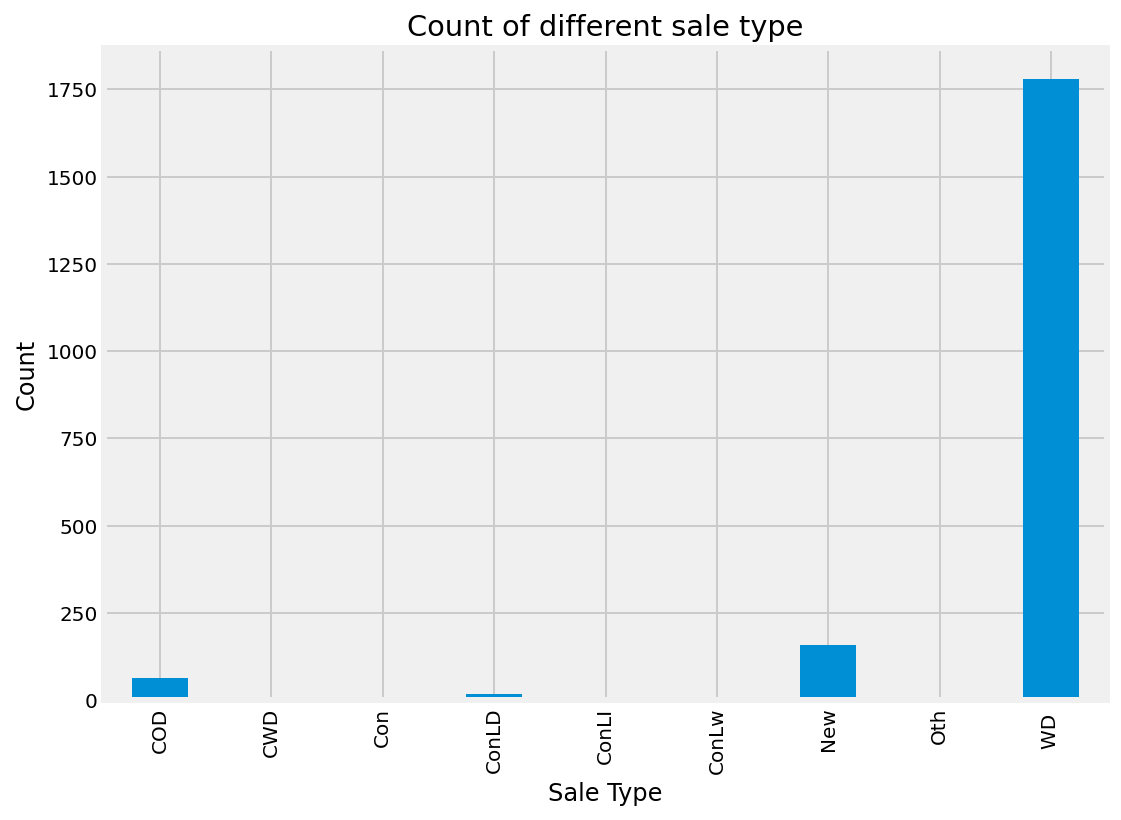

In [185]:
train_set.groupby('Sale Type').count()['Id'].plot(kind='bar',figsize=[8,6]);
plt.title('Count of different sale type')
plt.ylabel('Count')

In [186]:
train_set['Sale Type'] = train_set['Sale Type'].apply(lambda stype : stype if stype in ['WD ', 'New', 'COD'] else 'sale_type_other')
test_set['Sale Type'] = test_set['Sale Type'].apply(lambda stype : stype if stype in ['WD ', 'New', 'COD'] else 'sale_type_other')
# Reclass everything other than 'WD','New','COD' to sale_type_other

In [187]:
train_set[['sale_type_New', 'sale_type_WD ', 'sale_type_other']] = pd.get_dummies(train_set['Sale Type'], drop_first = True)
test_set[['sale_type_New', 'sale_type_WD ', 'sale_type_other']] = pd.get_dummies(test_set['Sale Type'], drop_first = True)
# create dummies for Sale Type
train_set.drop(columns = 'Sale Type', inplace = True)
test_set.drop(columns = 'Sale Type', inplace = True)
# Drop Sale Type column

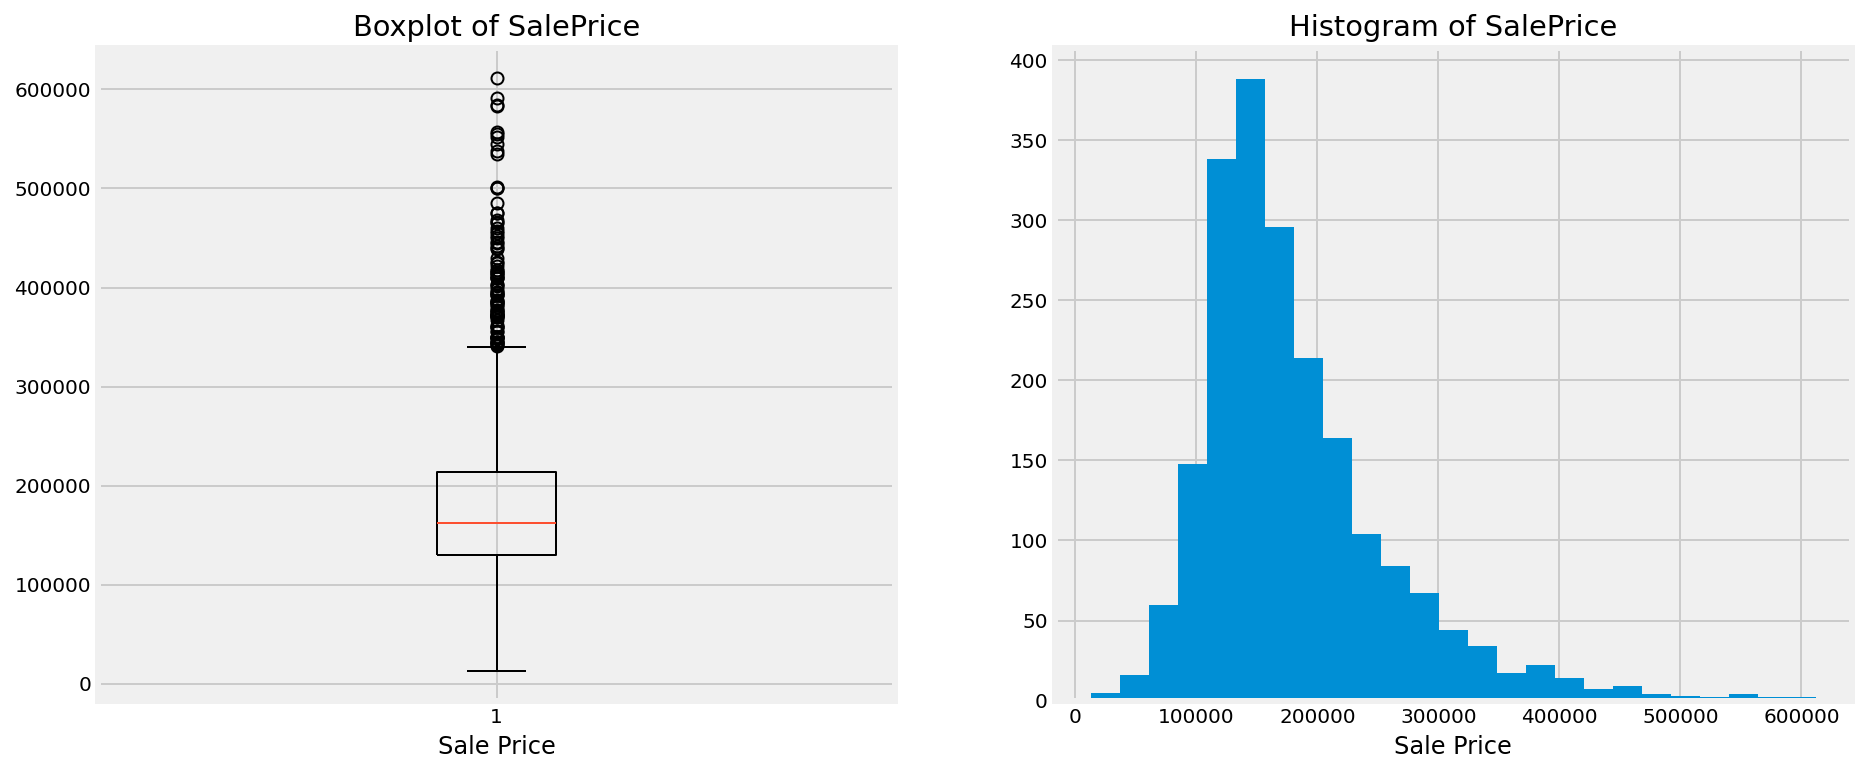

In [188]:
fig, ax = plt.subplots(1,2,figsize=[14,6]);
ax[0].boxplot(train_set['SalePrice'])
ax[0].set_xlabel('Sale Price');
ax[0].set_title('Boxplot of SalePrice');
ax[1].hist(train_set['SalePrice'], bins=25);
ax[1].set_xlabel('Sale Price');
ax[1].set_title('Histogram of SalePrice');
# There are several outliers in SalePrice

In [189]:
abs(train_set.corr()['SalePrice']).sort_values(ascending=False)[1:14]

Overall Qual         0.804410
Neighborhood_rank    0.721582
Gr Liv Area          0.720759
Exter Qual           0.715866
Kitchen Qual         0.694008
Total Bsmt SF        0.667955
Garage Area          0.655399
1st Flr SF           0.651941
Garage Cars          0.648670
Overall Cond         0.642632
Bsmt Qual            0.618223
Year Built           0.572934
Year Remod/Add       0.550780
Name: SalePrice, dtype: float64

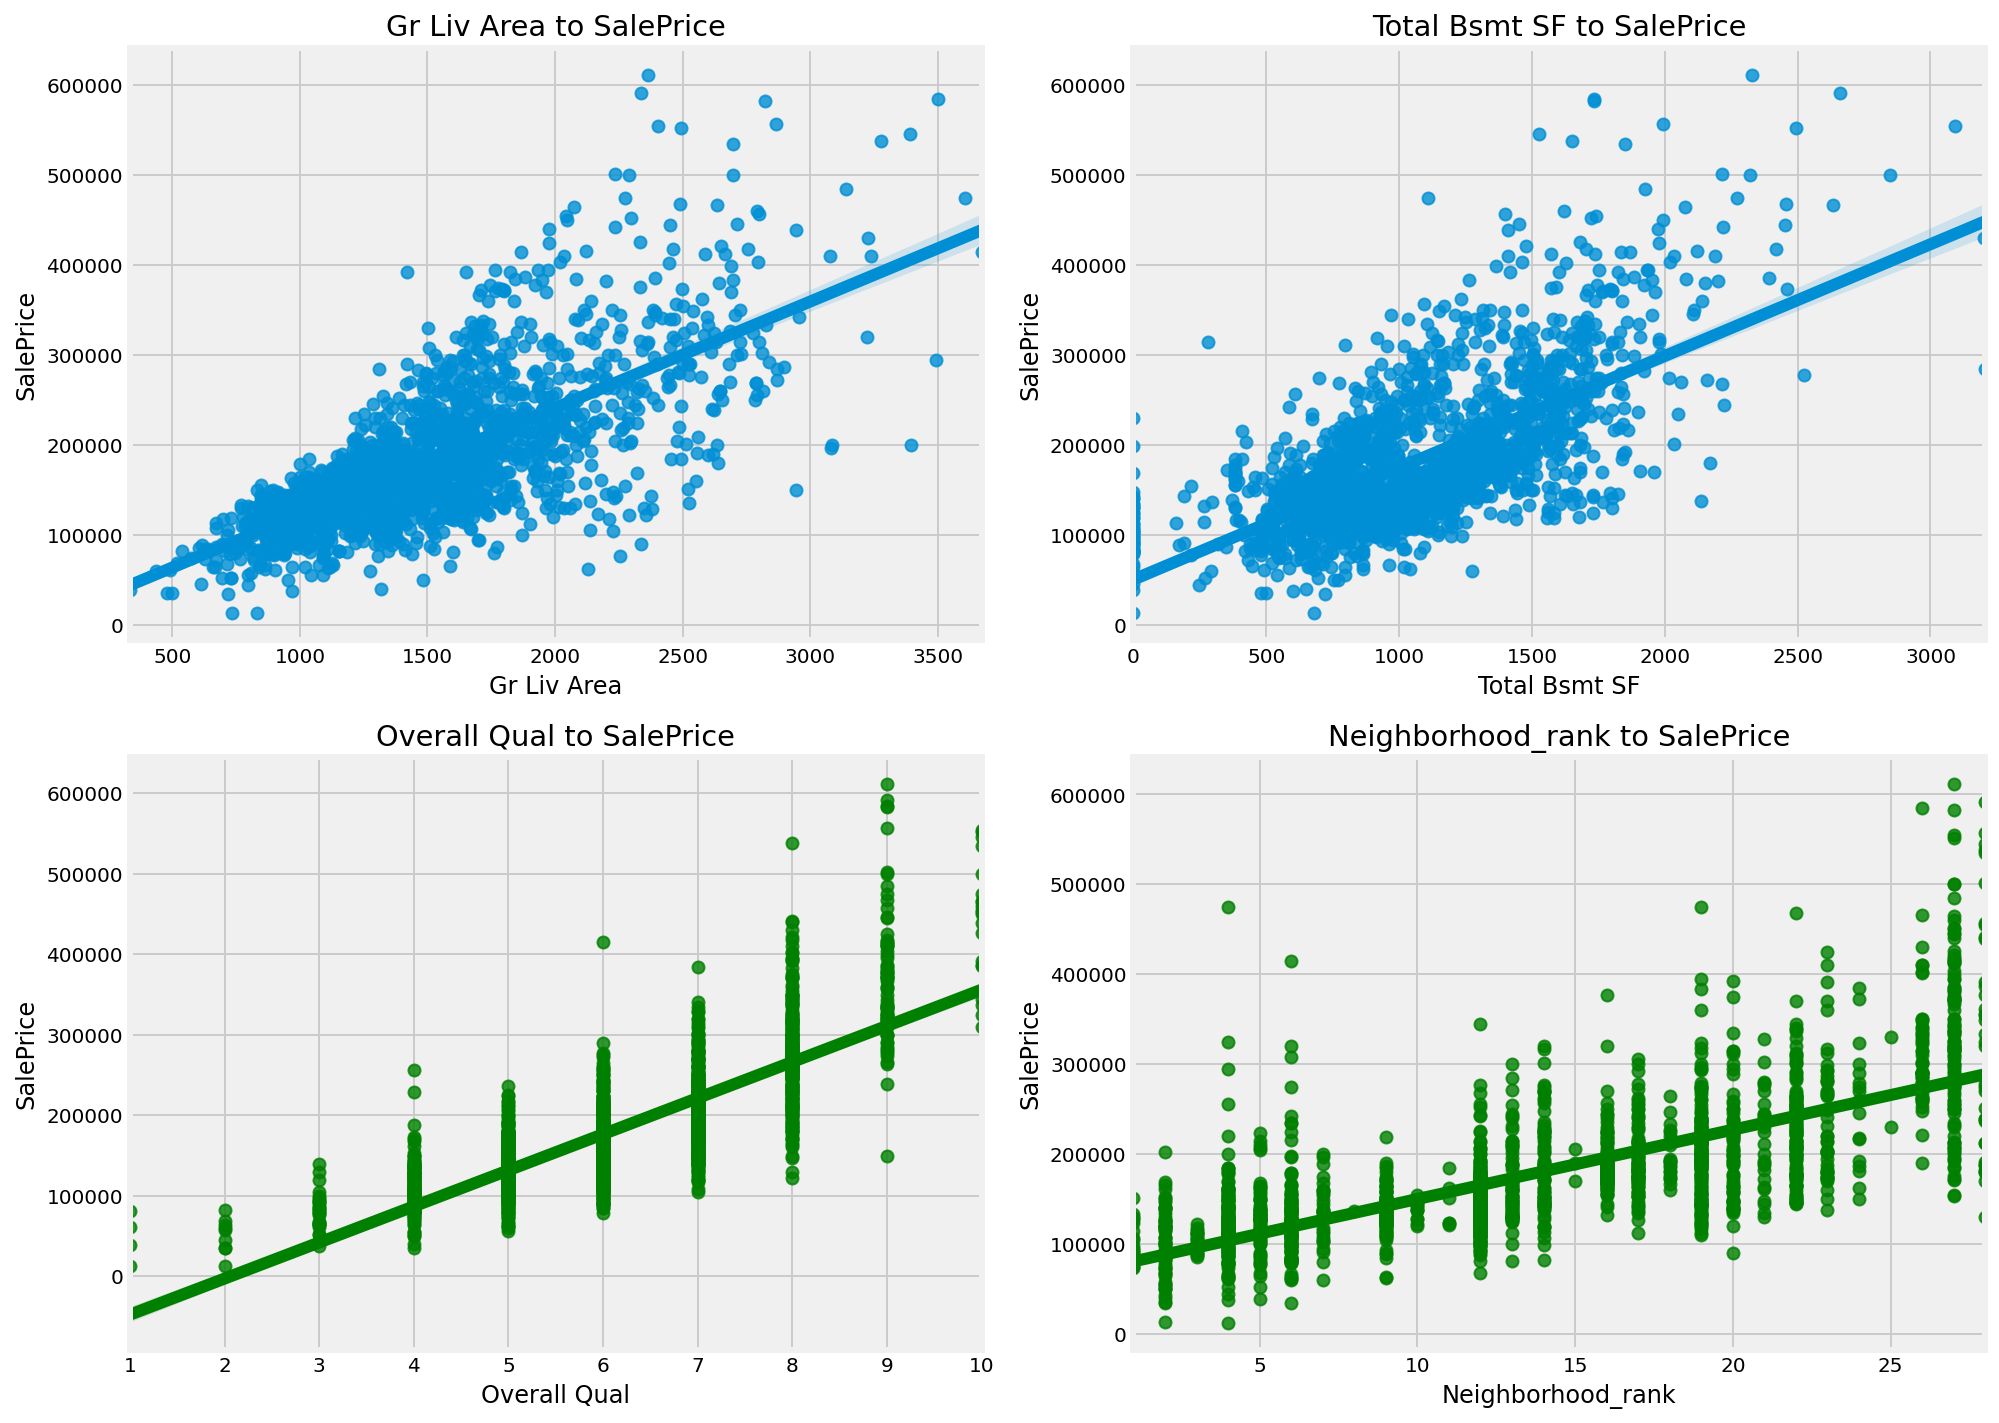

In [190]:
fig, ax = plt.subplots(2,2, figsize = [14,10]);
sns.regplot(x='Gr Liv Area', y='SalePrice', data = train_set, ax=ax[0,0]);
sns.regplot(x='Total Bsmt SF', y='SalePrice', data = train_set, ax=ax[0,1]);
sns.regplot(x='Overall Qual', y='SalePrice', data = train_set, ax=ax[1,0], color='g');
sns.regplot(x='Neighborhood_rank', y='SalePrice', data = train_set, ax=ax[1,1], color='g');
ax[0,0].set_title('Gr Liv Area to SalePrice');
ax[0,1].set_title('Total Bsmt SF to SalePrice');
ax[1,0].set_title('Overall Qual to SalePrice');
ax[1,1].set_title('Neighborhood_rank to SalePrice');
fig.tight_layout()

In [191]:
# We see an exponential increase in Sale price as Gr Liv area, total bsmt sf, Garage area and 1st flr sf increases
# Will multiply these features together to amplify the effect of the rate of change of any of these feature on sale prices

In [192]:
test_set.to_csv('../datasets/factor_test.csv') # Saving to CSV for testing later

In [193]:
train_set['Liv Area_bsmt sf'] = train_set['Gr Liv Area'] * train_set['Total Bsmt SF']
test_set['Liv Area_bsmt sf'] = test_set['Gr Liv Area'] * test_set['Total Bsmt SF']
train_set['qual_neighbor'] = train_set['Overall Qual'] * train_set['Neighborhood_rank']
test_set['qual_neighbor'] = test_set['Overall Qual'] * test_set['Neighborhood_rank'] # feature engineering

In [194]:
train_set['Liv Area_qual'] = train_set['Gr Liv Area'] * train_set['Overall Qual']
test_set['Liv Area_qual'] = test_set['Gr Liv Area'] * test_set['Overall Qual']
train_set['bsmt sf_neighbor'] = train_set['Total Bsmt SF'] * train_set['Neighborhood_rank']
test_set['bsmt sf_neighbor'] = test_set['Total Bsmt SF'] * test_set['Neighborhood_rank'] # feature engineering

In [195]:
train_set['Liv Area_neighbor'] = train_set['Gr Liv Area'] * train_set['Neighborhood_rank']
test_set['Liv Area_neighbor'] = test_set['Gr Liv Area'] * test_set['Neighborhood_rank']
train_set['bsmt sf_qual'] = train_set['Total Bsmt SF'] * train_set['Overall Qual']
test_set['bsmt sf_qual'] = test_set['Total Bsmt SF'] * test_set['Overall Qual'] # feature engineering

In [196]:
test_set.to_csv('../datasets/test_set.csv')
train_set.to_csv('../datasets/train_set.csv')
# saving the data to csv